In [1]:
import glob
import pandas as pd
import time
import datetime as dt
import os
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
import pathlib
from pathlib import Path
import glob
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
import math
import plotly.express as px
import sys
from scipy.stats import skew, kurtosis
from scipy.stats import spearmanr
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn import preprocessing
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn import preprocessing
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_tweedie_deviance
import sys
import umap as umap
def mean_absolute_percentage_error(y_true, y_predicted): 
    y_true, y_predicted = np.array(y_true), np.array(y_predicted)
    return np.mean(np.abs((y_true - y_predicted) / y_true)) * 100
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
os.chdir('D:/BGM_Codebase/+200mesh_test\/200_mesh_final/Raw_Data')

In [2]:
extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
print(all_filenames)

['compare-parameter-11_Sep_2023_13_03_37.xlsx']


In [4]:
Precip_Raw_Data = pd.DataFrame()
i=0
for fn in all_filenames:
    i=i+1
    tmp_df = pd.read_excel(fn,skiprows=7,parse_dates=['Historic Data From : ','Historic Data upto : '])
    tmp_df.rename(columns = {'Historic Data From : ':'Timestamp_From', 'Historic Data upto : ':'Timestamp_To'},inplace=True)
    tmp_df['Date']=tmp_df['Timestamp_From'].dt.date
    tmp_df['Date'] = pd.to_datetime(tmp_df.Date)
    tmp_df.columns = tmp_df.columns.str.replace('-Precipitation_Section', '')
    tmp_df.columns = tmp_df.columns.str.replace(' - Precipitation_Section', '')
    tmp_df.columns = tmp_df.columns.str.replace(' ', '_')
    print("Reading file ",i," :",fn," | ",tmp_df.shape)
    Precip_Raw_Data = pd.concat([Precip_Raw_Data, tmp_df], ignore_index=True)
    del (tmp_df)

Reading file  1  : compare-parameter-11_Sep_2023_13_03_37.xlsx  |  (9588, 37)


In [5]:
print(Precip_Raw_Data.head(50))

        Timestamp_From        Timestamp_To  Special_Filling_temp  Special_Filling_Flow  First_Agglo_Tank_Temp_T42  Tank_47_Temp  PPT-48_Temperature  Fine_Seed_Tonnage  Fine_Seed_Flow  Fine_Seed_Density  Fine_Seed_Charge  Fine_Seed_SSA  Fine_Seed_3_5u  Fine_Seed_45u  Fine_Seed_D50  PHE_Inlet_Temp  PHE_Outlet_Temp  Regular_Filling_Flow  Tank__52_Temp  Tank__56_Temp  Coarse_Seed_1_Tonnage  Coarse_Seed_2_Tonnage  Coarse_Seed_2_Flow  Coarse_Seed_1_Density  Coarse_Seed_2_Density  HAT_3_5u  HAT_45u  HAT_D50  Filling_Concentration  Filling_Ratio  Batch_Circulation_Hrs  Feed_Hydrate_D50  Feed_Hydrate_SSA  Feed_Hydrate_200  Feed_Hydrate_100  Feed_Hydrate_325       Date
0  2023-01-01 00:00:21 2023-01-01 01:00:00                 92.69                198.33                      78.54         76.76               53.23              58.68          120.09               1.49               NaN            NaN             NaN            NaN            NaN           71.00            50.64                412

In [6]:
Precip_Raw_Data.to_csv("D:/BGM_Codebase/+200mesh_test/200_mesh_final/Raw_Data/Precip_Raw_Data_200.csv", index=False)


In [7]:
Precip_Raw_Data=Precip_Raw_Data.sort_values(by = ['Timestamp_From','Timestamp_To'])
Precip_Raw_Data.reset_index(drop = True,inplace =True)

In [8]:
Agg_data=Precip_Raw_Data.copy()

In [9]:
Agg_data.drop(['Timestamp_From','Date','Fine_Seed_Charge','Batch_Circulation_Hrs'], axis = 1,inplace = True)

In [10]:
Agg_data.shape

(9588, 33)

In [11]:
Agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9588 entries, 0 to 9587
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp_To               9588 non-null   datetime64[ns]
 1   Special_Filling_temp       9514 non-null   float64       
 2   Special_Filling_Flow       9508 non-null   float64       
 3   First_Agglo_Tank_Temp_T42  9506 non-null   float64       
 4   Tank_47_Temp               9460 non-null   float64       
 5   PPT-48_Temperature         9512 non-null   float64       
 6   Fine_Seed_Tonnage          9511 non-null   float64       
 7   Fine_Seed_Flow             9509 non-null   float64       
 8   Fine_Seed_Density          9512 non-null   float64       
 9   Fine_Seed_SSA              1138 non-null   float64       
 10  Fine_Seed_3_5u             1138 non-null   float64       
 11  Fine_Seed_45u              1138 non-null   float64       
 12  Fine_S

In [12]:
Agg_data.set_index('Timestamp_To', inplace=True)

In [13]:
Agg_data.describe()

Special_Filling_temp  Special_Filling_Flow  First_Agglo_Tank_Temp_T42  Tank_47_Temp  PPT-48_Temperature  Fine_Seed_Tonnage  Fine_Seed_Flow  Fine_Seed_Density  Fine_Seed_SSA  Fine_Seed_3_5u  Fine_Seed_45u  Fine_Seed_D50  PHE_Inlet_Temp  PHE_Outlet_Temp  Regular_Filling_Flow  Tank__52_Temp  Tank__56_Temp  Coarse_Seed_1_Tonnage  Coarse_Seed_2_Tonnage  Coarse_Seed_2_Flow  Coarse_Seed_1_Density  Coarse_Seed_2_Density     HAT_3_5u      HAT_45u      HAT_D50  Filling_Concentration  Filling_Ratio  Feed_Hydrate_D50  Feed_Hydrate_SSA  Feed_Hydrate_200  Feed_Hydrate_100  Feed_Hydrate_325
count           9514.000000           9508.000000                9506.000000   9460.000000         9512.000000        9511.000000     9509.000000        9512.000000    1138.000000     1138.000000    1138.000000    1468.000000     9514.000000      9513.000000           9507.000000    9511.000000    9512.000000            9514.000000            9511.000000         9509.000000            9512.000000            9512.000000  1138.000000  1138.000000  1138.000000            2306.000000    2597.000000       1162.000000       1162.000000       9526.000000       9526.000000       9526.000000
mean              95.195630            170.411557                  76.834227     74.450077           56.030056          53.626872      116.637896           1.468083       0.115003        1.308919      43.470501      48.823082       72.425757        65.563350            160.377638      67.612950      66.376414             118.252141             140.171957          202.202256               1.549469               1.581241     0.713231    15.429657    76.230982             235.961683       0.663739         95.538417          0.051752         77.418749          3.871405         96.300861
std                4.931344             60.512484                  14.473753     11.480234            1.969784          20.456199       31.944249           0.078773       0.058343        0.521007      17.278873      10.040875        8.669304        12.538189             95.402101       7.187898       3.805140              32.789651              35.744016           49.465182               0.098950               0.094434     0.395116     8.560922    11.780017              45.857396       0.021089          9.203817          0.037956          6.887995          2.124976          1.921114
min               25.240000              0.000000                  20.880000     24.900000           38.860000          -2.900000        0.050000           0.990000       0.012000        0.000000       0.000000      24.500000        3.750000        26.100000              0.000000      25.170000      19.530000              -2.100000              -2.900000            0.230000               0.990000               0.990000     0.000000     0.000000     7.120000             176.600000       0.066000         69.700000          0.007000         48.000000          1.000000         92.000000
25%               94.800000            137.857500                  79.730000     71.497500           54.850000          39.370000       99.940000           1.430000       0.085000        1.000000      30.325000      41.900000       70.460000        55.430000             94.735000      65.850000      64.600000             102.602500             123.950000          180.970000               1.530000               1.560000     0.617500     9.325000    68.200000             231.325000       0.658000         88.900000          0.044000         74.000000          2.000000         95.000000
50%               95.730000            187.755000                  80.950000     78.180000           55.890000          52.600000      116.890000           1.480000       0.099000        1.200000      42.400000      49.100000       74.000000        63.190000            150.310000      67.620000      66.470000             120.600000             142.030000          199.850000               1.560000               1.590000     0.700000    14.750000    75.400000      

In [14]:
numeric_cols = Agg_data.select_dtypes(exclude=['datetime64']).columns

desc_stats = pd.DataFrame({
    'Mean': Agg_data[numeric_cols].mean(),
    'Median': Agg_data[numeric_cols].median(),
    'Min':Agg_data[numeric_cols].min(),
    'Max':Agg_data[numeric_cols].max(),
    'Variance': Agg_data[numeric_cols].var(),
    'Standard Deviation': Agg_data[numeric_cols].std()
})

In [15]:
desc_stats.head(50)

Mean   Median      Min       Max     Variance  Standard Deviation
Special_Filling_temp        95.195630   95.730   25.240   103.930    24.318151            4.931344
Special_Filling_Flow       170.411557  187.755    0.000   515.710  3661.760741           60.512484
First_Agglo_Tank_Temp_T42   76.834227   80.950   20.880   197.560   209.489529           14.473753
Tank_47_Temp                74.450077   78.180   24.900   125.400   131.795763           11.480234
PPT-48_Temperature          56.030056   55.890   38.860    78.160     3.880049            1.969784
Fine_Seed_Tonnage           53.626872   52.600   -2.900   115.000   418.456075           20.456199
Fine_Seed_Flow             116.637896  116.890    0.050   503.000  1020.435056           31.944249
Fine_Seed_Density            1.468083    1.480    0.990     1.710     0.006205            0.078773
Fine_Seed_SSA                0.115003    0.099    0.012     0.500     0.003404            0.058343
Fine_Seed_3_5u               1.308919    1.200    0.000     3.900     0.271448            0.521007
Fine_Seed_45u               43.470501   42.400    0.000    87.200   298.559455           17.278873
Fine_Seed_D50               48.823082   49.100   24.500   105.000   100.819162           10.040875
PHE_Inlet_Temp              72.425757   74.000    3.750    97.030    75.156834            8.669304
PHE_Outlet_Temp             65.563350   63.190   26.100    98.820   157.206173           12.538189
Regular_Filling_Flow       160.377638  150.310    0.000   501.000  9101.560805           95.402101
Tank__52_Temp               67.612950   67.620   25.170    81.660    51.665883            7.187898
Tank__56_Temp               66.376414   66.470   19.530    77.340    14.479089            3.805140
Coarse_Seed_1_Tonnage      118.252141  120.600   -2.100   257.690  1075.161230           32.789651
Coarse_Seed_2_Tonnage      140.171957  142.030   -2.900   278.540  1277.634673           35.744016
Coarse_Seed_2_Flow         202.202256  199.850    0.230   610.000  2446.804182           49.465182
Coarse_Seed_1_Density        1.549469    1.560    0.990     1.740     0.009791            0.098950
Coarse_Seed_2_Density        1.581241    1.590    0.990     1.860     0.008918            0.094434
HAT_3_5u                     0.713231    0.700    0.000     7.000     0.156117            0.395116
HAT_45u                     15.429657   14.750    0.000    50.600    73.289378            8.560922
HAT_D50                     76.230982   75.400    7.120   120.600   138.768803           11.780017
Filling_Concentration      235.961683  235.200  176.600  2419.000  2102.900778           45.857396
Filling_Ratio                0.663739    0.664    0.066     0.703     0.000445            0.021089
Feed_Hydrate_D50            95.538417   94.200   69.700   121.400    84.710256            9.203817
Feed_Hydrate_SSA             0.051752    0.047    0.007     0.700     0.001441            0.037956
Feed_Hydrate_200            77.418749   77.000   48.000    92.000    47.444474            6.887995
Feed_Hydrate_100             3.871405    3.000    1.000    11.000     4.515522            2.124976
Feed_Hydrate_325            96.300861   96.000   92.000    99.000     3.690681            1.921114

In [16]:
desc_stats.to_csv("D:/BGM_Codebase/+200mesh_test/200_mesh_final/Raw_Data/Descriptive_stats.csv")

In [17]:
Agg_data.isna().sum().sort_values(ascending =False)

Fine_Seed_3_5u               8450
Fine_Seed_45u                8450
Fine_Seed_SSA                8450
HAT_3_5u                     8450
HAT_45u                      8450
HAT_D50                      8450
Feed_Hydrate_D50             8426
Feed_Hydrate_SSA             8426
Fine_Seed_D50                8120
Filling_Concentration        7282
Filling_Ratio                6991
Tank_47_Temp                  128
First_Agglo_Tank_Temp_T42      82
Regular_Filling_Flow           81
Special_Filling_Flow           80
Fine_Seed_Flow                 79
Coarse_Seed_2_Flow             79
Coarse_Seed_2_Tonnage          77
Tank__52_Temp                  77
Fine_Seed_Tonnage              77
PPT-48_Temperature             76
Coarse_Seed_1_Density          76
Tank__56_Temp                  76
Fine_Seed_Density              76
Coarse_Seed_2_Density          76
PHE_Outlet_Temp                75
PHE_Inlet_Temp                 74
Special_Filling_temp           74
Coarse_Seed_1_Tonnage          74
Feed_Hydrate_2

In [18]:

columns_with_few_na = [col for col, na_count in Agg_data.isna().sum().items() if na_count < 100]
print(columns_with_few_na)


['Special_Filling_temp', 'Special_Filling_Flow', 'First_Agglo_Tank_Temp_T42', 'PPT-48_Temperature', 'Fine_Seed_Tonnage', 'Fine_Seed_Flow', 'Fine_Seed_Density', 'PHE_Inlet_Temp', 'PHE_Outlet_Temp', 'Regular_Filling_Flow', 'Tank__52_Temp', 'Tank__56_Temp', 'Coarse_Seed_1_Tonnage', 'Coarse_Seed_2_Tonnage', 'Coarse_Seed_2_Flow', 'Coarse_Seed_1_Density', 'Coarse_Seed_2_Density', 'Feed_Hydrate_200', 'Feed_Hydrate_100', 'Feed_Hydrate_325']


In [19]:
Precip_data_parameters=Agg_data[columns_with_few_na]

In [20]:
Precip_data_parameters.isna().sum().sort_values(ascending =False)

First_Agglo_Tank_Temp_T42    82
Regular_Filling_Flow         81
Special_Filling_Flow         80
Fine_Seed_Flow               79
Coarse_Seed_2_Flow           79
Fine_Seed_Tonnage            77
Coarse_Seed_2_Tonnage        77
Tank__52_Temp                77
Coarse_Seed_1_Density        76
PPT-48_Temperature           76
Tank__56_Temp                76
Fine_Seed_Density            76
Coarse_Seed_2_Density        76
PHE_Outlet_Temp              75
Special_Filling_temp         74
PHE_Inlet_Temp               74
Coarse_Seed_1_Tonnage        74
Feed_Hydrate_200             62
Feed_Hydrate_100             62
Feed_Hydrate_325             62
dtype: int64

In [21]:
Precip_data_parameters.interpolate(method='linear', limit_direction='backward', inplace=True)

In [22]:
Precip_data_parameters.isna().sum().sort_values(ascending =False)

Special_Filling_temp         64
Special_Filling_Flow         64
First_Agglo_Tank_Temp_T42    64
PPT-48_Temperature           64
Fine_Seed_Tonnage            64
Fine_Seed_Flow               64
Fine_Seed_Density            64
PHE_Inlet_Temp               64
PHE_Outlet_Temp              64
Regular_Filling_Flow         64
Tank__52_Temp                64
Tank__56_Temp                64
Coarse_Seed_1_Tonnage        64
Coarse_Seed_2_Tonnage        64
Coarse_Seed_2_Flow           64
Coarse_Seed_1_Density        64
Coarse_Seed_2_Density        64
Feed_Hydrate_200             62
Feed_Hydrate_100             62
Feed_Hydrate_325             62
dtype: int64

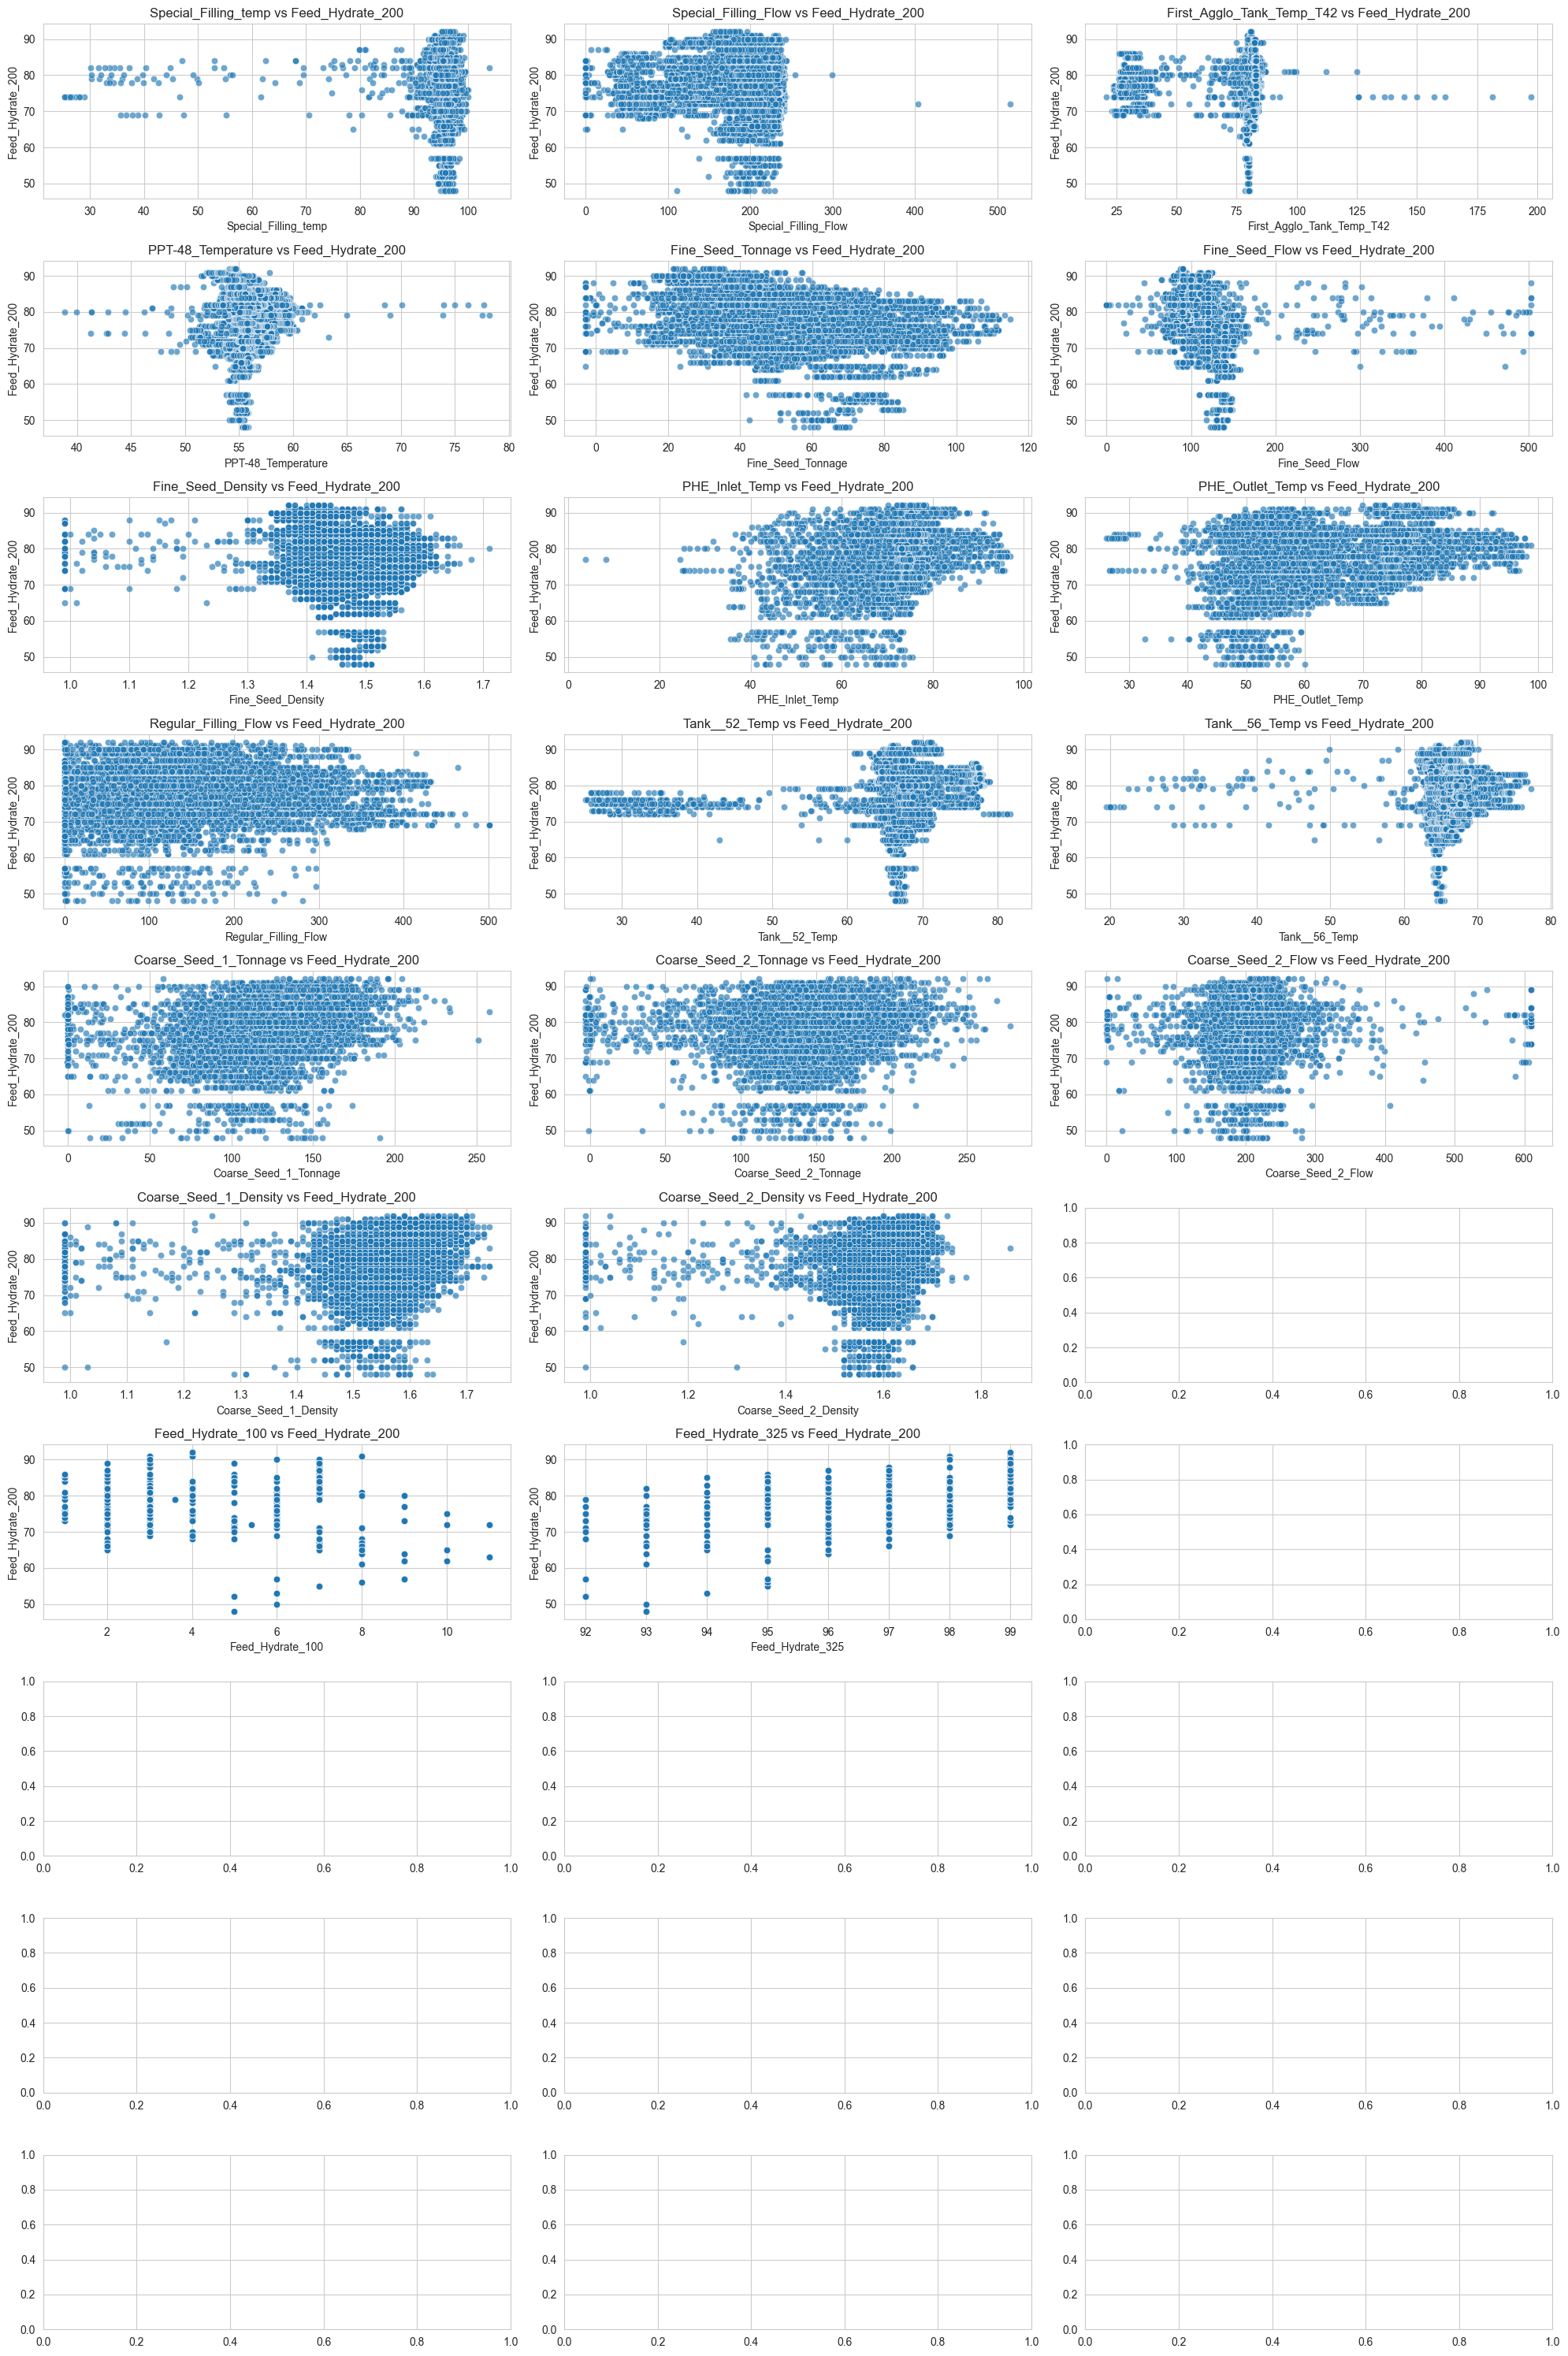

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's styling instead of plt.style.use()
sns.set_style("whitegrid")

# Create subplots (10 rows, 3 columns)
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))
axes = axes.ravel()

# Loop through each column and plot scatterplots
for idx, col in enumerate(Precip_data_parameters.columns):
    if col != "Feed_Hydrate_200":  
        sns.scatterplot(data=Precip_data_parameters, x=col, y="Feed_Hydrate_200", ax=axes[idx], alpha=0.65)
        axes[idx].set_title(f"{col} vs Feed_Hydrate_200")
        axes[idx].set_ylabel("Feed_Hydrate_200")
        axes[idx].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



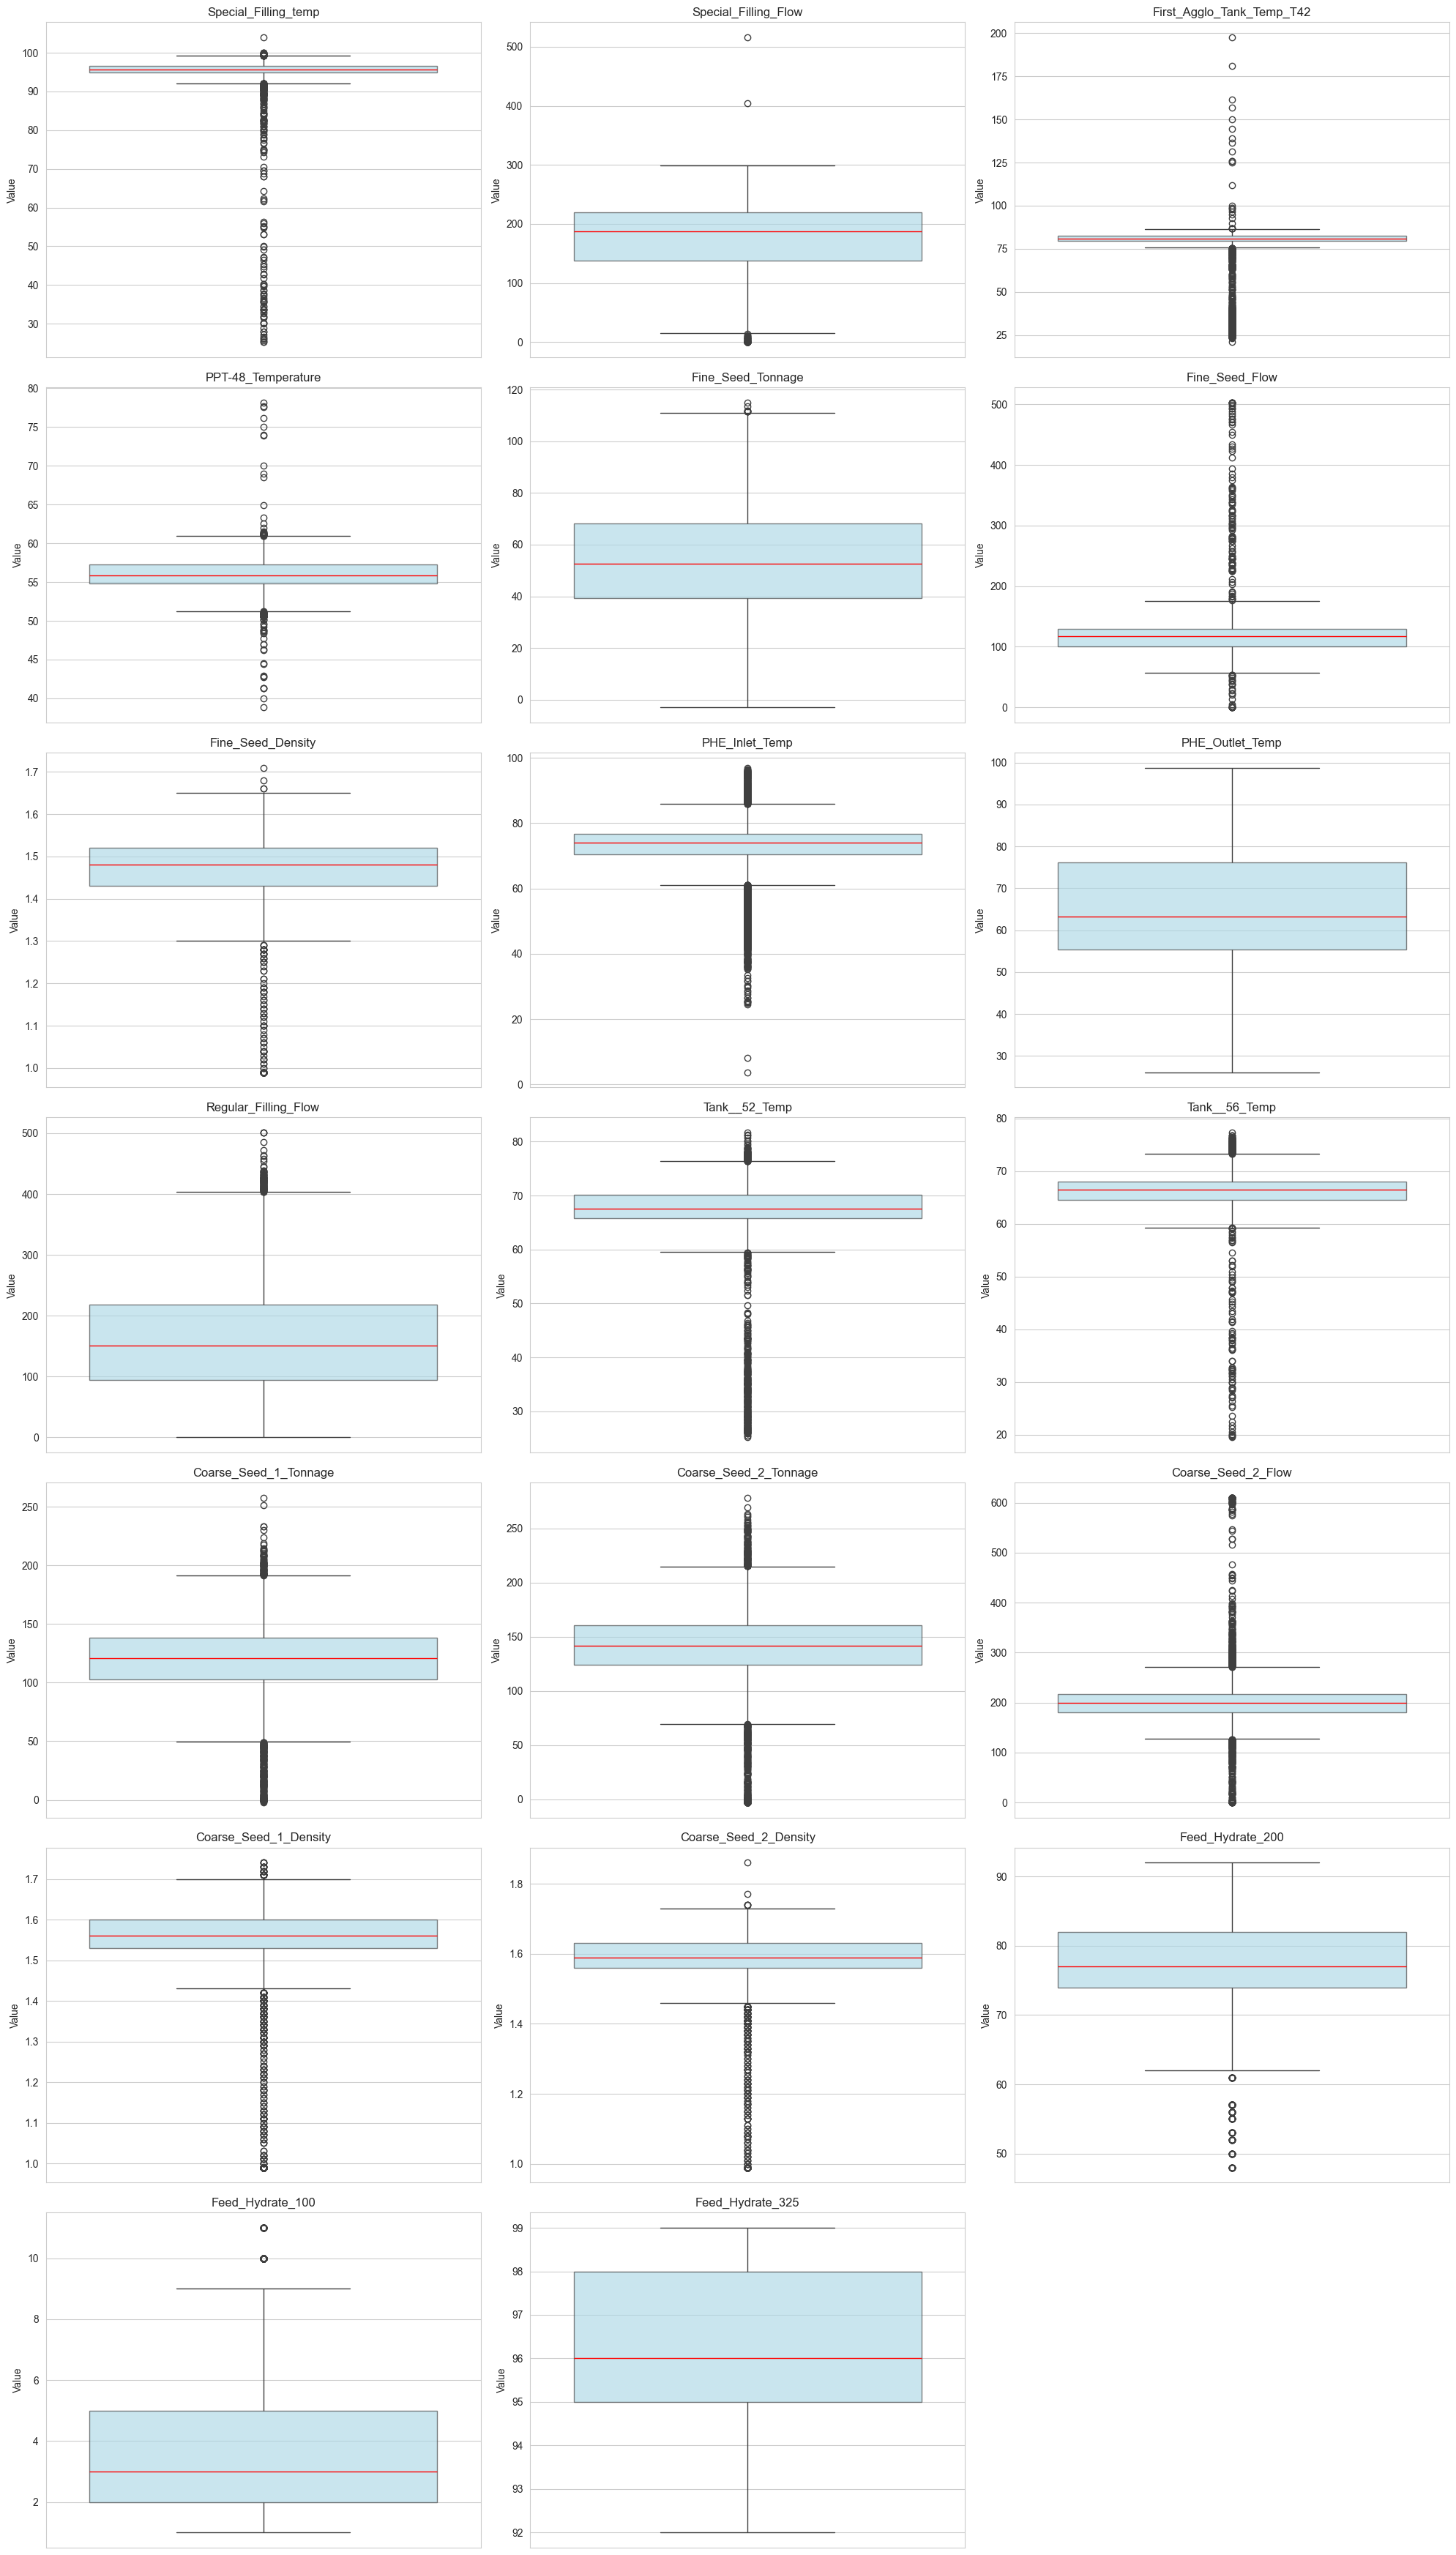

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Set style for plots
sns.set_style("whitegrid")

# Get the number of columns (features) to plot
num_columns = len(Precip_data_parameters.columns)

# Calculate number of rows and columns for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Dynamically calculate number of rows

# Create the subplots with the appropriate size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))

# Flatten axes for easy access
axes = axes.ravel()

# Function to color quartiles
def color_quartiles(box_plot, feature):
    data = Precip_data_parameters[feature].dropna()
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.5)
    q3 = data.quantile(0.75)

    # Color boxes based on quartiles
    for i, box in enumerate(box_plot.patches):
        if i < 2:
            box.set_facecolor('lightblue')
        elif i < 4:
            box.set_facecolor('lightgreen')
        else:
            box.set_facecolor('lightyellow')
    
    # Set the color of the median line
    box_plot.lines[4].set_color('red')

# Loop over columns to create boxplots
for idx, col in enumerate(Precip_data_parameters.columns):
    bplot = sns.boxplot(y=Precip_data_parameters[col], ax=axes[idx], boxprops=dict(alpha=.65))
    color_quartiles(bplot, col)
    axes[idx].set_title(col)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Value")

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [25]:

outliers_count = {}

for col in Precip_data_parameters.columns:
    Q1 = Precip_data_parameters[col].quantile(0.25)
    Q3 = Precip_data_parameters[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Precip_data_parameters[(Precip_data_parameters[col] < lower_bound) | 
                                      (Precip_data_parameters[col] > upper_bound)]
    outliers_count[col] = len(outliers)




In [26]:
Precip_data_parameters.shape

(9588, 20)

In [27]:
outliers_count

{'Special_Filling_temp': 315,
 'Special_Filling_Flow': 91,
 'First_Agglo_Tank_Temp_T42': 1006,
 'PPT-48_Temperature': 94,
 'Fine_Seed_Tonnage': 8,
 'Fine_Seed_Flow': 144,
 'Fine_Seed_Density': 157,
 'PHE_Inlet_Temp': 1202,
 'PHE_Outlet_Temp': 0,
 'Regular_Filling_Flow': 94,
 'Tank__52_Temp': 938,
 'Tank__56_Temp': 249,
 'Coarse_Seed_1_Tonnage': 423,
 'Coarse_Seed_2_Tonnage': 484,
 'Coarse_Seed_2_Flow': 510,
 'Coarse_Seed_1_Density': 427,
 'Coarse_Seed_2_Density': 384,
 'Feed_Hydrate_200': 216,
 'Feed_Hydrate_100': 168,
 'Feed_Hydrate_325': 0}

In [28]:
columns_with_lab_params = [col for col, na_count in Agg_data.isna().sum().items() if na_count > 100]
print(columns_with_lab_params)

['Tank_47_Temp', 'Fine_Seed_SSA', 'Fine_Seed_3_5u', 'Fine_Seed_45u', 'Fine_Seed_D50', 'HAT_3_5u', 'HAT_45u', 'HAT_D50', 'Filling_Concentration', 'Filling_Ratio', 'Feed_Hydrate_D50', 'Feed_Hydrate_SSA']


In [29]:
Precip_data_lab_params=Agg_data[columns_with_lab_params]

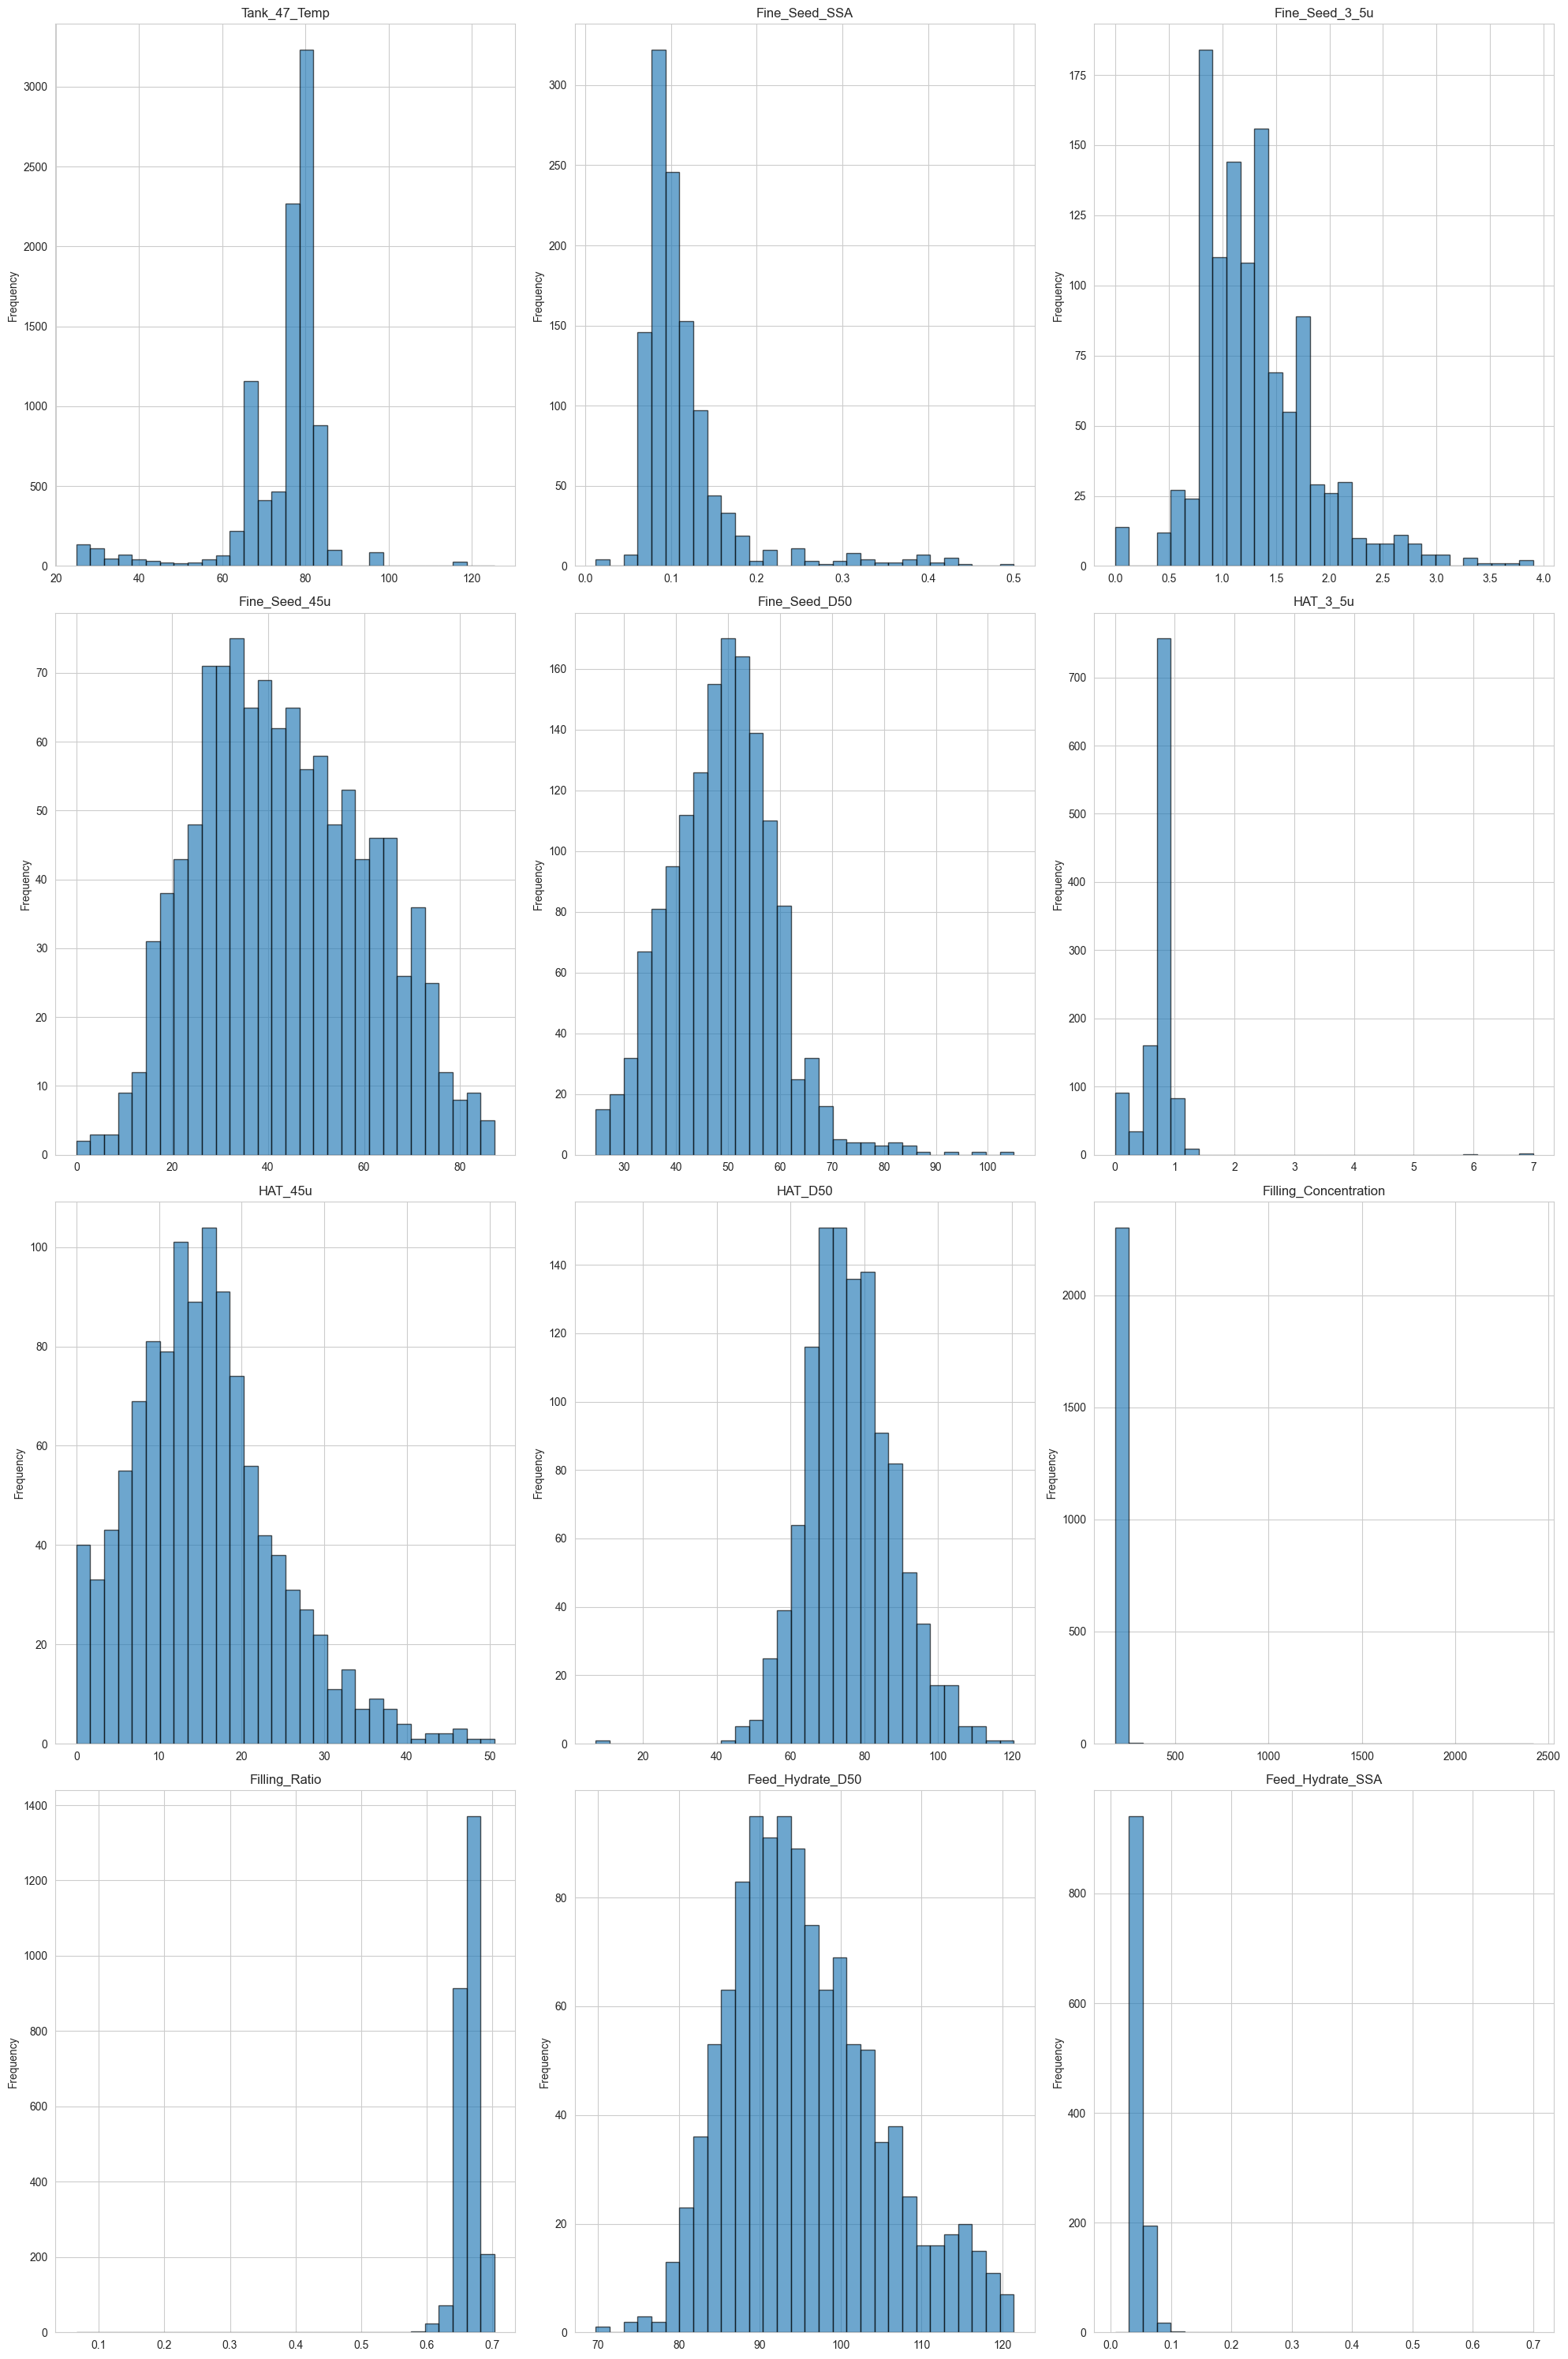

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's styling
sns.set_style("whitegrid")

# Create subplots (4 rows, 3 columns)
num_columns = len(Precip_data_lab_params.columns)  # Get the number of columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))

# Flatten the axes array
axes = axes.ravel()

# Loop through each column to plot histograms
for idx, col in enumerate(Precip_data_lab_params.columns):
    if idx < len(axes):  # Avoid exceeding the number of subplots
        axes[idx].hist(Precip_data_lab_params[col], bins=30, edgecolor='k', alpha=0.65)
        axes[idx].set_title(col)
        axes[idx].set_ylabel("Frequency")
        axes[idx].set_xlabel("")

# Remove any unused subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


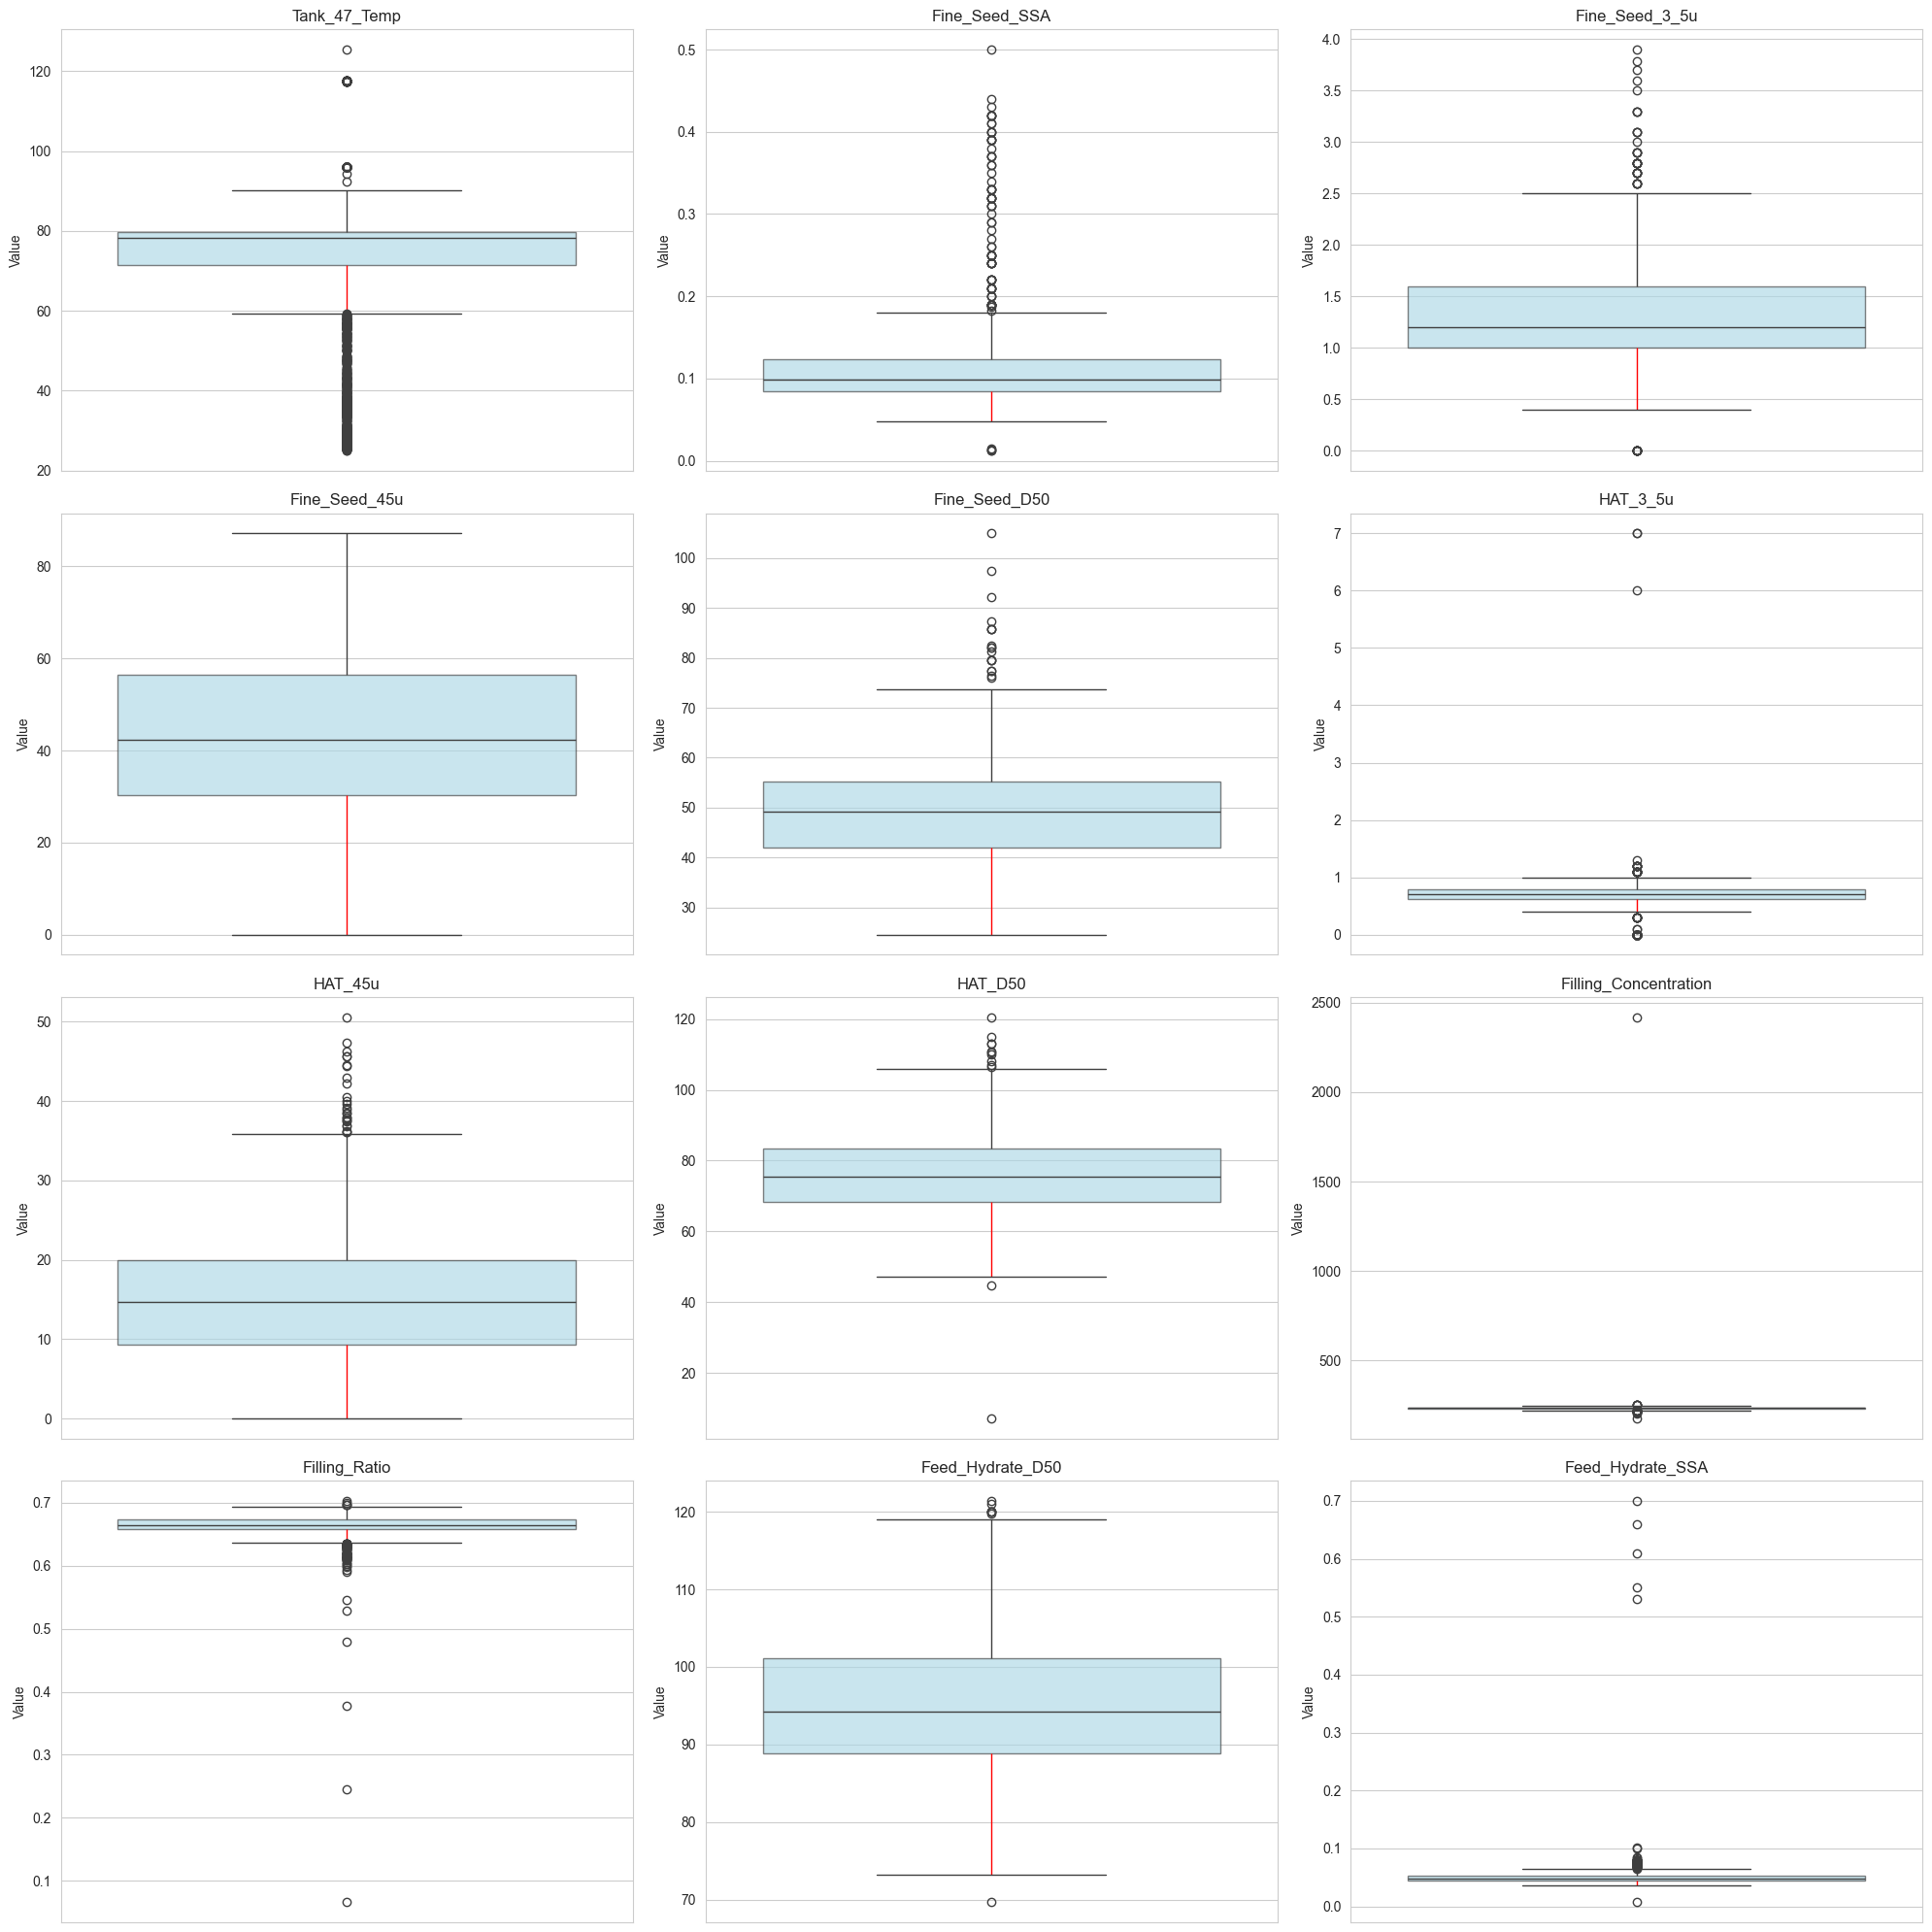

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Use Seaborn's styling
sns.set_style("whitegrid")

# Get the number of columns
num_columns = len(Precip_data_lab_params.columns)

# Dynamically determine subplot grid size
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Auto-calculate rows needed
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(20, 5 * rows))

# Flatten the axes array
axes = axes.ravel()

# Function to color boxplot quartiles
def color_quartiles(box_plot, feature):
    boxes = [patch for patch in box_plot.get_children() if isinstance(patch, mpatches.PathPatch)]
    
    # Get quartiles
    data = Precip_data_lab_params[feature].dropna()
    q1, q2, q3 = data.quantile([0.25, 0.5, 0.75])
    
    # Set colors for different quartiles
    colors = ['lightblue', 'lightgreen', 'lightyellow']
    
    for i, box in enumerate(boxes[:3]):  # Ensure only first 3 boxes are colored
        box.set_facecolor(colors[i])
    
    # Color the median line
    median_lines = [line for line in box_plot.get_lines() if line.get_linestyle() == '-']
    if median_lines:
        median_lines[0].set_color('red')

# Loop through each column to plot boxplots
for idx, col in enumerate(Precip_data_lab_params.columns):
    if idx < len(axes):  # Avoid exceeding subplot limit
        bplot = sns.boxplot(y=Precip_data_lab_params[col], ax=axes[idx], boxprops=dict(alpha=.65))
        color_quartiles(bplot, col)
        axes[idx].set_title(col)
        axes[idx].set_xlabel("")
        axes[idx].set_ylabel("Value")

# Remove unused subplots if any
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [32]:

outliers_count_lab = {}

for col in Precip_data_lab_params.columns:
    Q1 = Precip_data_lab_params[col].quantile(0.25)
    Q3 = Precip_data_lab_params[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Precip_data_lab_params[(Precip_data_lab_params[col] < lower_bound) | 
                                      (Precip_data_lab_params[col] > upper_bound)]
    
    outliers_count_lab[col] = len(outliers)




In [33]:
outliers_count_lab

{'Tank_47_Temp': 666,
 'Fine_Seed_SSA': 80,
 'Fine_Seed_3_5u': 49,
 'Fine_Seed_45u': 0,
 'Fine_Seed_D50': 18,
 'HAT_3_5u': 135,
 'HAT_45u': 26,
 'HAT_D50': 12,
 'Filling_Concentration': 24,
 'Filling_Ratio': 83,
 'Feed_Hydrate_D50': 8,
 'Feed_Hydrate_SSA': 89}

In [34]:
columns_to_aggregate = ['Special_Filling_temp','Special_Filling_Flow','First_Agglo_Tank_Temp_T42','Tank_47_Temp',
                        'PPT-48_Temperature','Fine_Seed_Tonnage','Fine_Seed_Flow','Fine_Seed_Density',
                       'PHE_Inlet_Temp','PHE_Outlet_Temp','Regular_Filling_Flow','Tank__52_Temp','Tank__56_Temp',
                        'Coarse_Seed_1_Tonnage','Coarse_Seed_2_Tonnage','Coarse_Seed_2_Flow','Coarse_Seed_1_Density',
                        'Coarse_Seed_2_Density',]
columns_to_resample = ['Fine_Seed_SSA','Fine_Seed_3_5u','Fine_Seed_45u','Fine_Seed_D50','HAT_3_5u','HAT_45u','HAT_D50',
                       'Filling_Concentration','Filling_Ratio','Feed_Hydrate_D50','Feed_Hydrate_SSA','Feed_Hydrate_200','Feed_Hydrate_100','Feed_Hydrate_325']

In [35]:
resample_frequency = '8H'
agg_functions = {

    'mean': 'mean'
}

In [36]:
df=Agg_data.copy()
#df.set_index('Timestamp_To', inplace=True)

In [37]:
resampled_df = pd.DataFrame()

for feature in df.columns:
    if feature in columns_to_aggregate:
        for agg_name, agg_func in agg_functions.items():
            new_feature_name = f'{feature}_{agg_name}'
            resampled_df[new_feature_name] = df[feature].resample(resample_frequency).apply(agg_func)
    elif feature in columns_to_resample:
        resampled_df[feature] = df[feature].resample(resample_frequency).mean() 

In [38]:
print(resampled_df.shape)

(1205, 32)


In [39]:
resampled_df.columns

Index(['Special_Filling_temp_mean', 'Special_Filling_Flow_mean', 'First_Agglo_Tank_Temp_T42_mean', 'Tank_47_Temp_mean', 'PPT-48_Temperature_mean', 'Fine_Seed_Tonnage_mean', 'Fine_Seed_Flow_mean', 'Fine_Seed_Density_mean', 'Fine_Seed_SSA', 'Fine_Seed_3_5u', 'Fine_Seed_45u', 'Fine_Seed_D50', 'PHE_Inlet_Temp_mean', 'PHE_Outlet_Temp_mean', 'Regular_Filling_Flow_mean', 'Tank__52_Temp_mean', 'Tank__56_Temp_mean', 'Coarse_Seed_1_Tonnage_mean', 'Coarse_Seed_2_Tonnage_mean', 'Coarse_Seed_2_Flow_mean', 'Coarse_Seed_1_Density_mean', 'Coarse_Seed_2_Density_mean', 'HAT_3_5u', 'HAT_45u', 'HAT_D50', 'Filling_Concentration', 'Filling_Ratio', 'Feed_Hydrate_D50', 'Feed_Hydrate_SSA', 'Feed_Hydrate_200', 'Feed_Hydrate_100', 'Feed_Hydrate_325'], dtype='object')

In [40]:
resampled_df.isna().sum().sort_values(ascending =False)

Fine_Seed_3_5u                    67
Fine_Seed_45u                     67
Fine_Seed_SSA                     67
HAT_3_5u                          67
HAT_45u                           67
HAT_D50                           67
Fine_Seed_D50                     52
Feed_Hydrate_D50                  43
Feed_Hydrate_SSA                  43
Filling_Concentration             37
Filling_Ratio                     28
Tank_47_Temp_mean                 16
Tank__52_Temp_mean                10
Fine_Seed_Density_mean            10
Fine_Seed_Flow_mean               10
PPT-48_Temperature_mean           10
Coarse_Seed_2_Flow_mean           10
Coarse_Seed_2_Density_mean        10
Coarse_Seed_1_Density_mean        10
Tank__56_Temp_mean                10
First_Agglo_Tank_Temp_T42_mean     9
Special_Filling_Flow_mean          9
Special_Filling_temp_mean          9
Fine_Seed_Tonnage_mean             9
Regular_Filling_Flow_mean          9
PHE_Outlet_Temp_mean               9
PHE_Inlet_Temp_mean                9
C

In [41]:
resampled_df.to_csv("D:/BGM_Codebase/+200mesh_test/200_mesh_final/Raw_Data/resampled_df.csv")

In [42]:
resampled_df.interpolate(method='linear', limit_direction='backward', inplace=True)

In [43]:
resampled_df.isna().sum().sort_values(ascending =False)

Special_Filling_temp_mean         8
Special_Filling_Flow_mean         8
First_Agglo_Tank_Temp_T42_mean    8
Tank_47_Temp_mean                 8
PPT-48_Temperature_mean           8
Fine_Seed_Tonnage_mean            8
Fine_Seed_Flow_mean               8
Fine_Seed_Density_mean            8
Tank__52_Temp_mean                8
Regular_Filling_Flow_mean         8
PHE_Outlet_Temp_mean              8
PHE_Inlet_Temp_mean               8
Coarse_Seed_2_Flow_mean           8
Coarse_Seed_2_Tonnage_mean        8
Coarse_Seed_1_Tonnage_mean        8
Tank__56_Temp_mean                8
Coarse_Seed_1_Density_mean        8
Coarse_Seed_2_Density_mean        8
Feed_Hydrate_325                  7
Feed_Hydrate_100                  7
Feed_Hydrate_200                  7
Fine_Seed_3_5u                    0
Fine_Seed_45u                     0
Fine_Seed_D50                     0
Fine_Seed_SSA                     0
HAT_3_5u                          0
HAT_45u                           0
HAT_D50                     

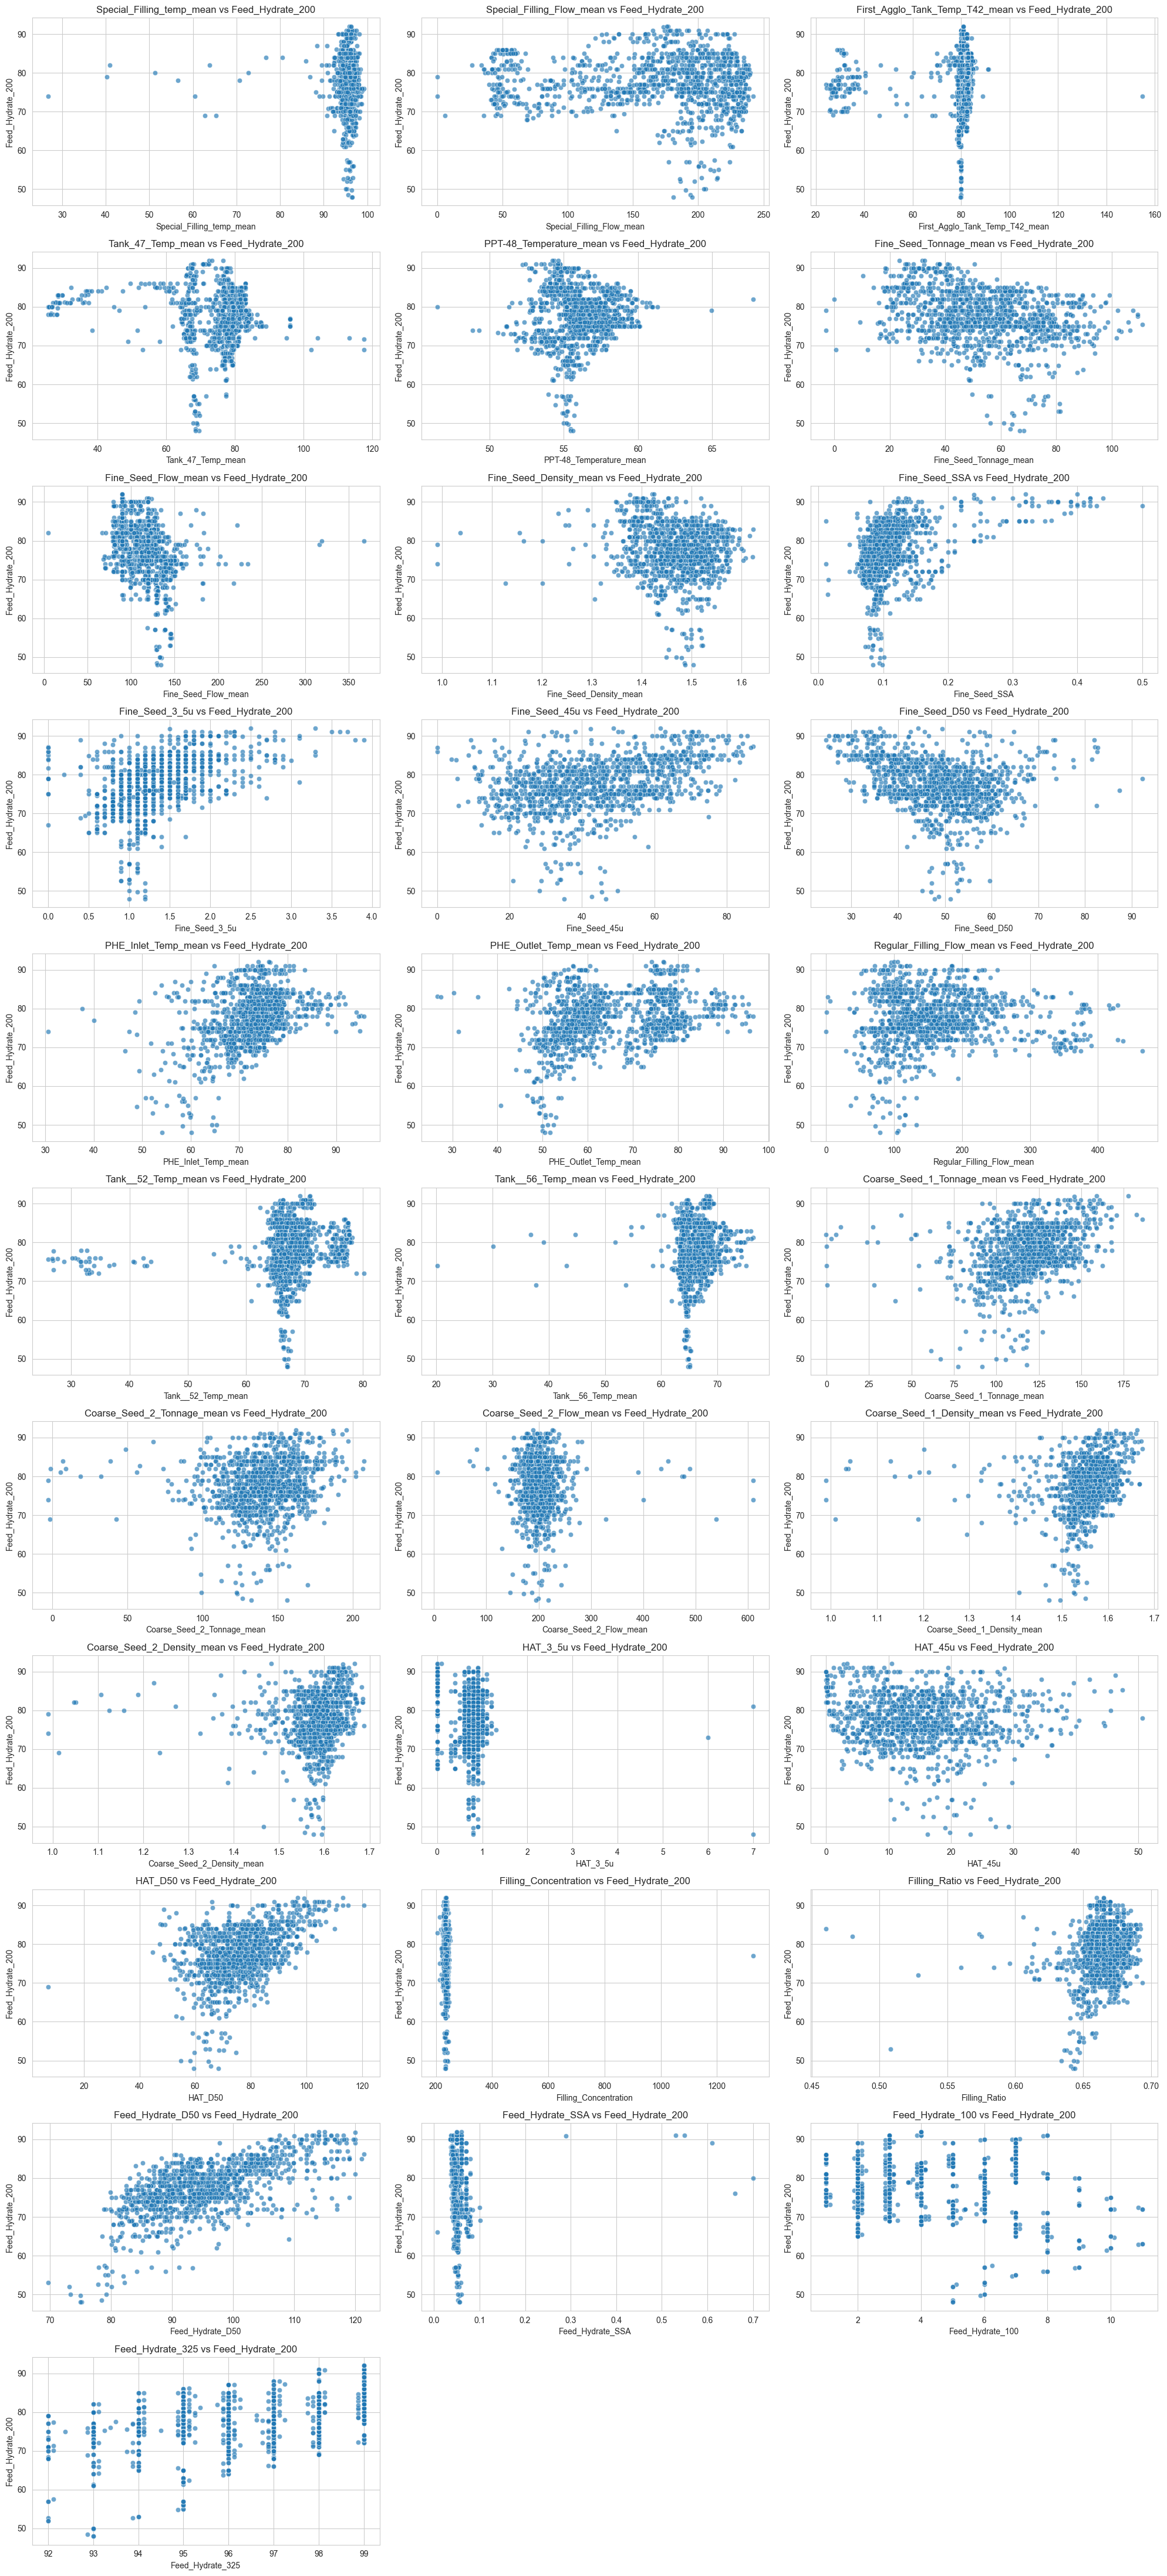

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Target variable for Y-axis
target_col = "Feed_Hydrate_200"

# Start with all columns except the target
features = [col for col in resampled_df.columns if col != target_col]

# Ensure Feed_Hydrate_100 and Feed_Hydrate_325 are included (if available)
for col in ["Feed_Hydrate_100", "Feed_Hydrate_325"]:
    if col not in features and col in resampled_df.columns:
        features.append(col)

# Layout settings
num_cols = 3
num_rows = (len(features) + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 4))
axes = axes.ravel()

# Plot each feature vs Feed_Hydrate_200
for idx, col in enumerate(features):
    sns.scatterplot(data=resampled_df, x=col, y=target_col, ax=axes[idx], alpha=0.65)
    axes[idx].set_title(f"{col} vs {target_col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_col)

# Hide any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


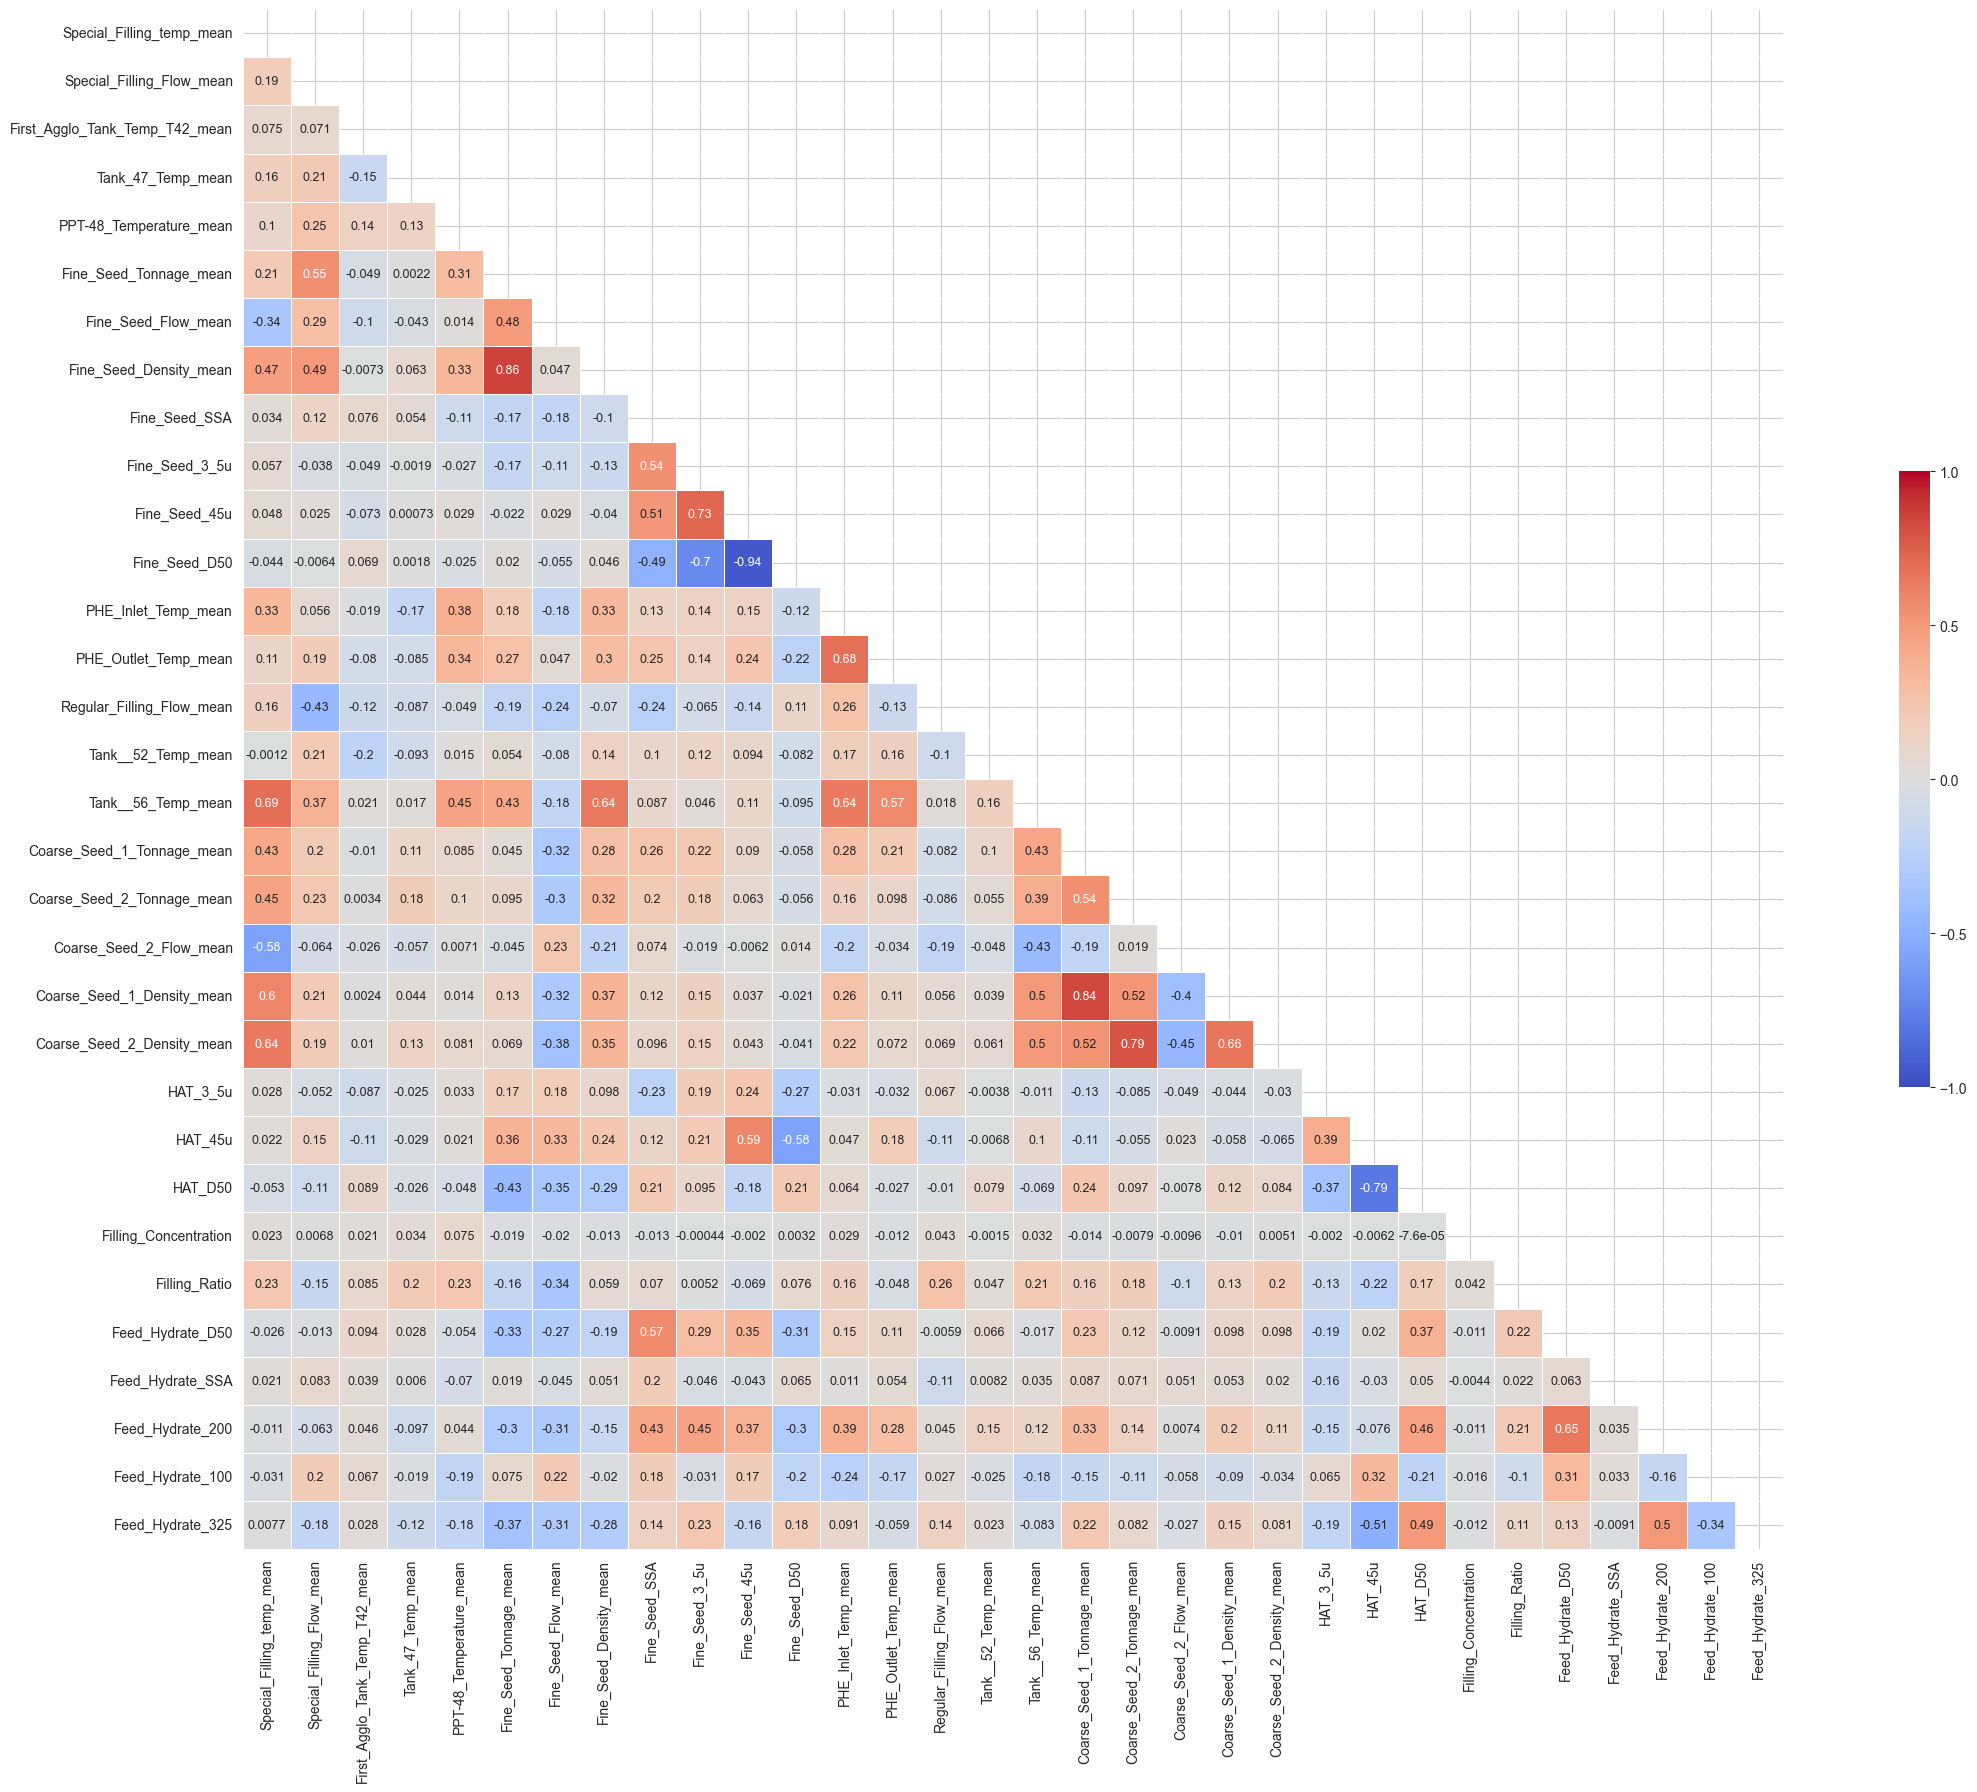

In [45]:
corr_matrix=resampled_df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

In [46]:
df=Agg_data.copy()

In [47]:
resample_frequency = '24H'
agg_functions = {
    'min': 'min',
    'max': 'max',
    'median': 'median',
    'mean': 'mean',
    'std': 'std', 
    'var': 'var', 
    'var_coeff': lambda x: x.std() / x.mean() if x.mean() != 0 else 0, 
    'kurtosis': lambda x: x.kurtosis(),  
    'skewness': lambda x: x.skew(),
    'percentile_25': lambda x: np.percentile(x, 25),  
    'percentile_50': lambda x: np.percentile(x, 50),  
    'percentile_75': lambda x: np.percentile(x, 75),  
    'percentile_90': lambda x: np.percentile(x, 90),  
    'percentile_100': lambda x: np.percentile(x, 100),  
}

In [48]:
resampled_df = pd.DataFrame()

for feature in df.columns:
    if feature in columns_to_aggregate:
        for agg_name, agg_func in agg_functions.items():
            new_feature_name = f'{feature}_{agg_name}'
            resampled_df[new_feature_name] = df[feature].resample(resample_frequency).apply(agg_func)
    elif feature in columns_to_resample:
        resampled_df[feature] = df[feature].resample(resample_frequency).mean() 

In [49]:
print(resampled_df.shape)

(402, 266)


In [50]:
resampled_df.interpolate(method='linear', limit_direction='backward', inplace=True)

In [51]:
final_df=resampled_df.copy()

In [52]:
columns_to_drop = [col for col in final_df.columns if col not in ["Feed_Hydrate_200", "Feed_Hydrate_100", "Feed_Hydrate_325"]]


In [53]:
df_lag = final_df.copy()  
for shift_amount in range(21, 72):
    for column_name in final_df.columns:
        feature_name = f'{column_name}_shift_{shift_amount}'
        df_lag[feature_name] = final_df[column_name].shift(shift_amount)


In [54]:
df_lag = df_lag.drop(columns=columns_to_drop)

In [55]:
df_lag.shape

(402, 13569)

In [56]:
df_lag_cleaned = df_lag.dropna()

In [57]:
Final_df_lag=df_lag_cleaned[['Coarse_Seed_2_Tonnage_percentile_50_shift_21',
 'Coarse_Seed_2_Density_std_shift_21',
 'HAT_D50_shift_21',
 'PPT-48_Temperature_kurtosis_shift_22',
 'Regular_Filling_Flow_percentile_25_shift_22',
 'HAT_D50_shift_22',
 'PHE_Inlet_Temp_std_shift_23',
 'Regular_Filling_Flow_skewness_shift_23',
 'Tank__56_Temp_kurtosis_shift_23',
 'Coarse_Seed_2_Tonnage_max_shift_23',
 'Feed_Hydrate_SSA_shift_23',
 'Fine_Seed_Flow_skewness_shift_24',
 'Fine_Seed_Flow_percentile_75_shift_24',
 'PHE_Inlet_Temp_percentile_25_shift_24',
 'Coarse_Seed_2_Density_median_shift_24',
 'Fine_Seed_Flow_percentile_75_shift_25',
 'PHE_Inlet_Temp_kurtosis_shift_25',
 'Regular_Filling_Flow_std_shift_25',
 'Regular_Filling_Flow_var_coeff_shift_25',
 'HAT_D50_shift_25',
 'Tank__52_Temp_std_shift_26',
 'HAT_45u_shift_26',
 'HAT_D50_shift_26',
 'Special_Filling_temp_kurtosis_shift_28',
 'Fine_Seed_Flow_percentile_75_shift_28',
 'Special_Filling_Flow_skewness_shift_29',
 'Tank__52_Temp_skewness_shift_29',
 'Coarse_Seed_2_Flow_var_coeff_shift_29',
 'Coarse_Seed_2_Flow_percentile_75_shift_29',
 'HAT_D50_shift_29',
 'First_Agglo_Tank_Temp_T42_kurtosis_shift_30',
 'Tank__56_Temp_std_shift_30',
 'Coarse_Seed_1_Tonnage_max_shift_30',
 'Coarse_Seed_1_Tonnage_percentile_75_shift_31',
 'HAT_D50_shift_31',
 'Coarse_Seed_2_Density_percentile_25_shift_32',
 'HAT_45u_shift_32',
 'HAT_45u_shift_33',
 'Special_Filling_Flow_max_shift_34',
 'Tank_47_Temp_std_shift_34',
 'Feed_Hydrate_SSA_shift_35',
 'Fine_Seed_Density_skewness_shift_36',
 'Regular_Filling_Flow_max_shift_37',
 'Coarse_Seed_1_Density_min_shift_37',
 'Fine_Seed_Flow_median_shift_38',
 'Tank__52_Temp_skewness_shift_38',
 'Fine_Seed_Density_kurtosis_shift_39',
 'Tank__56_Temp_skewness_shift_39',
 'Coarse_Seed_2_Density_percentile_90_shift_39',
 'Feed_Hydrate_SSA_shift_39',
 'Tank_47_Temp_std_shift_40',
 'Tank_47_Temp_skewness_shift_40',
 'Special_Filling_temp_skewness_shift_41',
 'PHE_Inlet_Temp_kurtosis_shift_41',
 'Coarse_Seed_2_Flow_mean_shift_41',
 'HAT_45u_shift_41',
 'Fine_Seed_Tonnage_mean_shift_42',
 'PHE_Outlet_Temp_percentile_90_shift_42',
 'HAT_45u_shift_42',
 'Fine_Seed_Tonnage_max_shift_43',
 'Fine_Seed_Tonnage_min_shift_45',
 'PHE_Outlet_Temp_std_shift_46',
 'Coarse_Seed_2_Flow_median_shift_46',
 'PHE_Inlet_Temp_max_shift_48',
 'PHE_Outlet_Temp_std_shift_48',
 'PHE_Inlet_Temp_kurtosis_shift_49',
 'HAT_45u_shift_49',
 'First_Agglo_Tank_Temp_T42_skewness_shift_51',
 'HAT_D50_shift_52',
 'PPT-48_Temperature_min_shift_53',
 'Coarse_Seed_2_Flow_percentile_100_shift_53',
 'PPT-48_Temperature_min_shift_54',
 'Coarse_Seed_2_Density_percentile_75_shift_57',
 'Special_Filling_Flow_std_shift_60',
 'Special_Filling_temp_kurtosis_shift_62',
 'Special_Filling_Flow_kurtosis_shift_62',
 'PHE_Inlet_Temp_std_shift_63',
 'Tank__56_Temp_median_shift_63',
 'PPT-48_Temperature_kurtosis_shift_64',
 'PHE_Inlet_Temp_min_shift_64',
 'Coarse_Seed_2_Flow_percentile_75_shift_64',
 'Coarse_Seed_1_Density_std_shift_65',
 'Fine_Seed_Flow_kurtosis_shift_66',
 'Tank__56_Temp_std_shift_66',
 'PPT-48_Temperature_kurtosis_shift_68',
 'Tank_47_Temp_max_shift_70',
 'PHE_Outlet_Temp_skewness_shift_70',
 'Tank__56_Temp_std_shift_70',
 'Coarse_Seed_2_Tonnage_median_shift_70',
 'Coarse_Seed_2_Flow_percentile_100_shift_70',
 'PPT-48_Temperature_max_shift_71',
 'PPT-48_Temperature_kurtosis_shift_71',
 'PHE_Outlet_Temp_kurtosis_shift_71',
 'Feed_Hydrate_200',
 'Feed_Hydrate_325',
 'Feed_Hydrate_100',
 'Feed_Hydrate_200_shift_45',
 'Feed_Hydrate_200_shift_46',
 'Feed_Hydrate_200_shift_48',
 'Feed_Hydrate_200_shift_51']]

In [58]:
Final_df_lag.shape

(329, 100)

In [59]:
# Define your target columns
target_columns = ["Feed_Hydrate_100", "Feed_Hydrate_200", "Feed_Hydrate_325"]

# Get all other columns except the target ones
columns_without_target = [col for col in Final_df_lag.columns if col not in target_columns]

# Split features into chunks of 25
splits = [columns_without_target[i:i+25] for i in range(0, len(columns_without_target), 25)]

# Create separate DataFrames with each chunk + all three target columns
dfs = [Final_df_lag[split + target_columns] for split in splits]


In [60]:
df1=dfs[0]

In [61]:
Final_df_lag.shape

(329, 100)

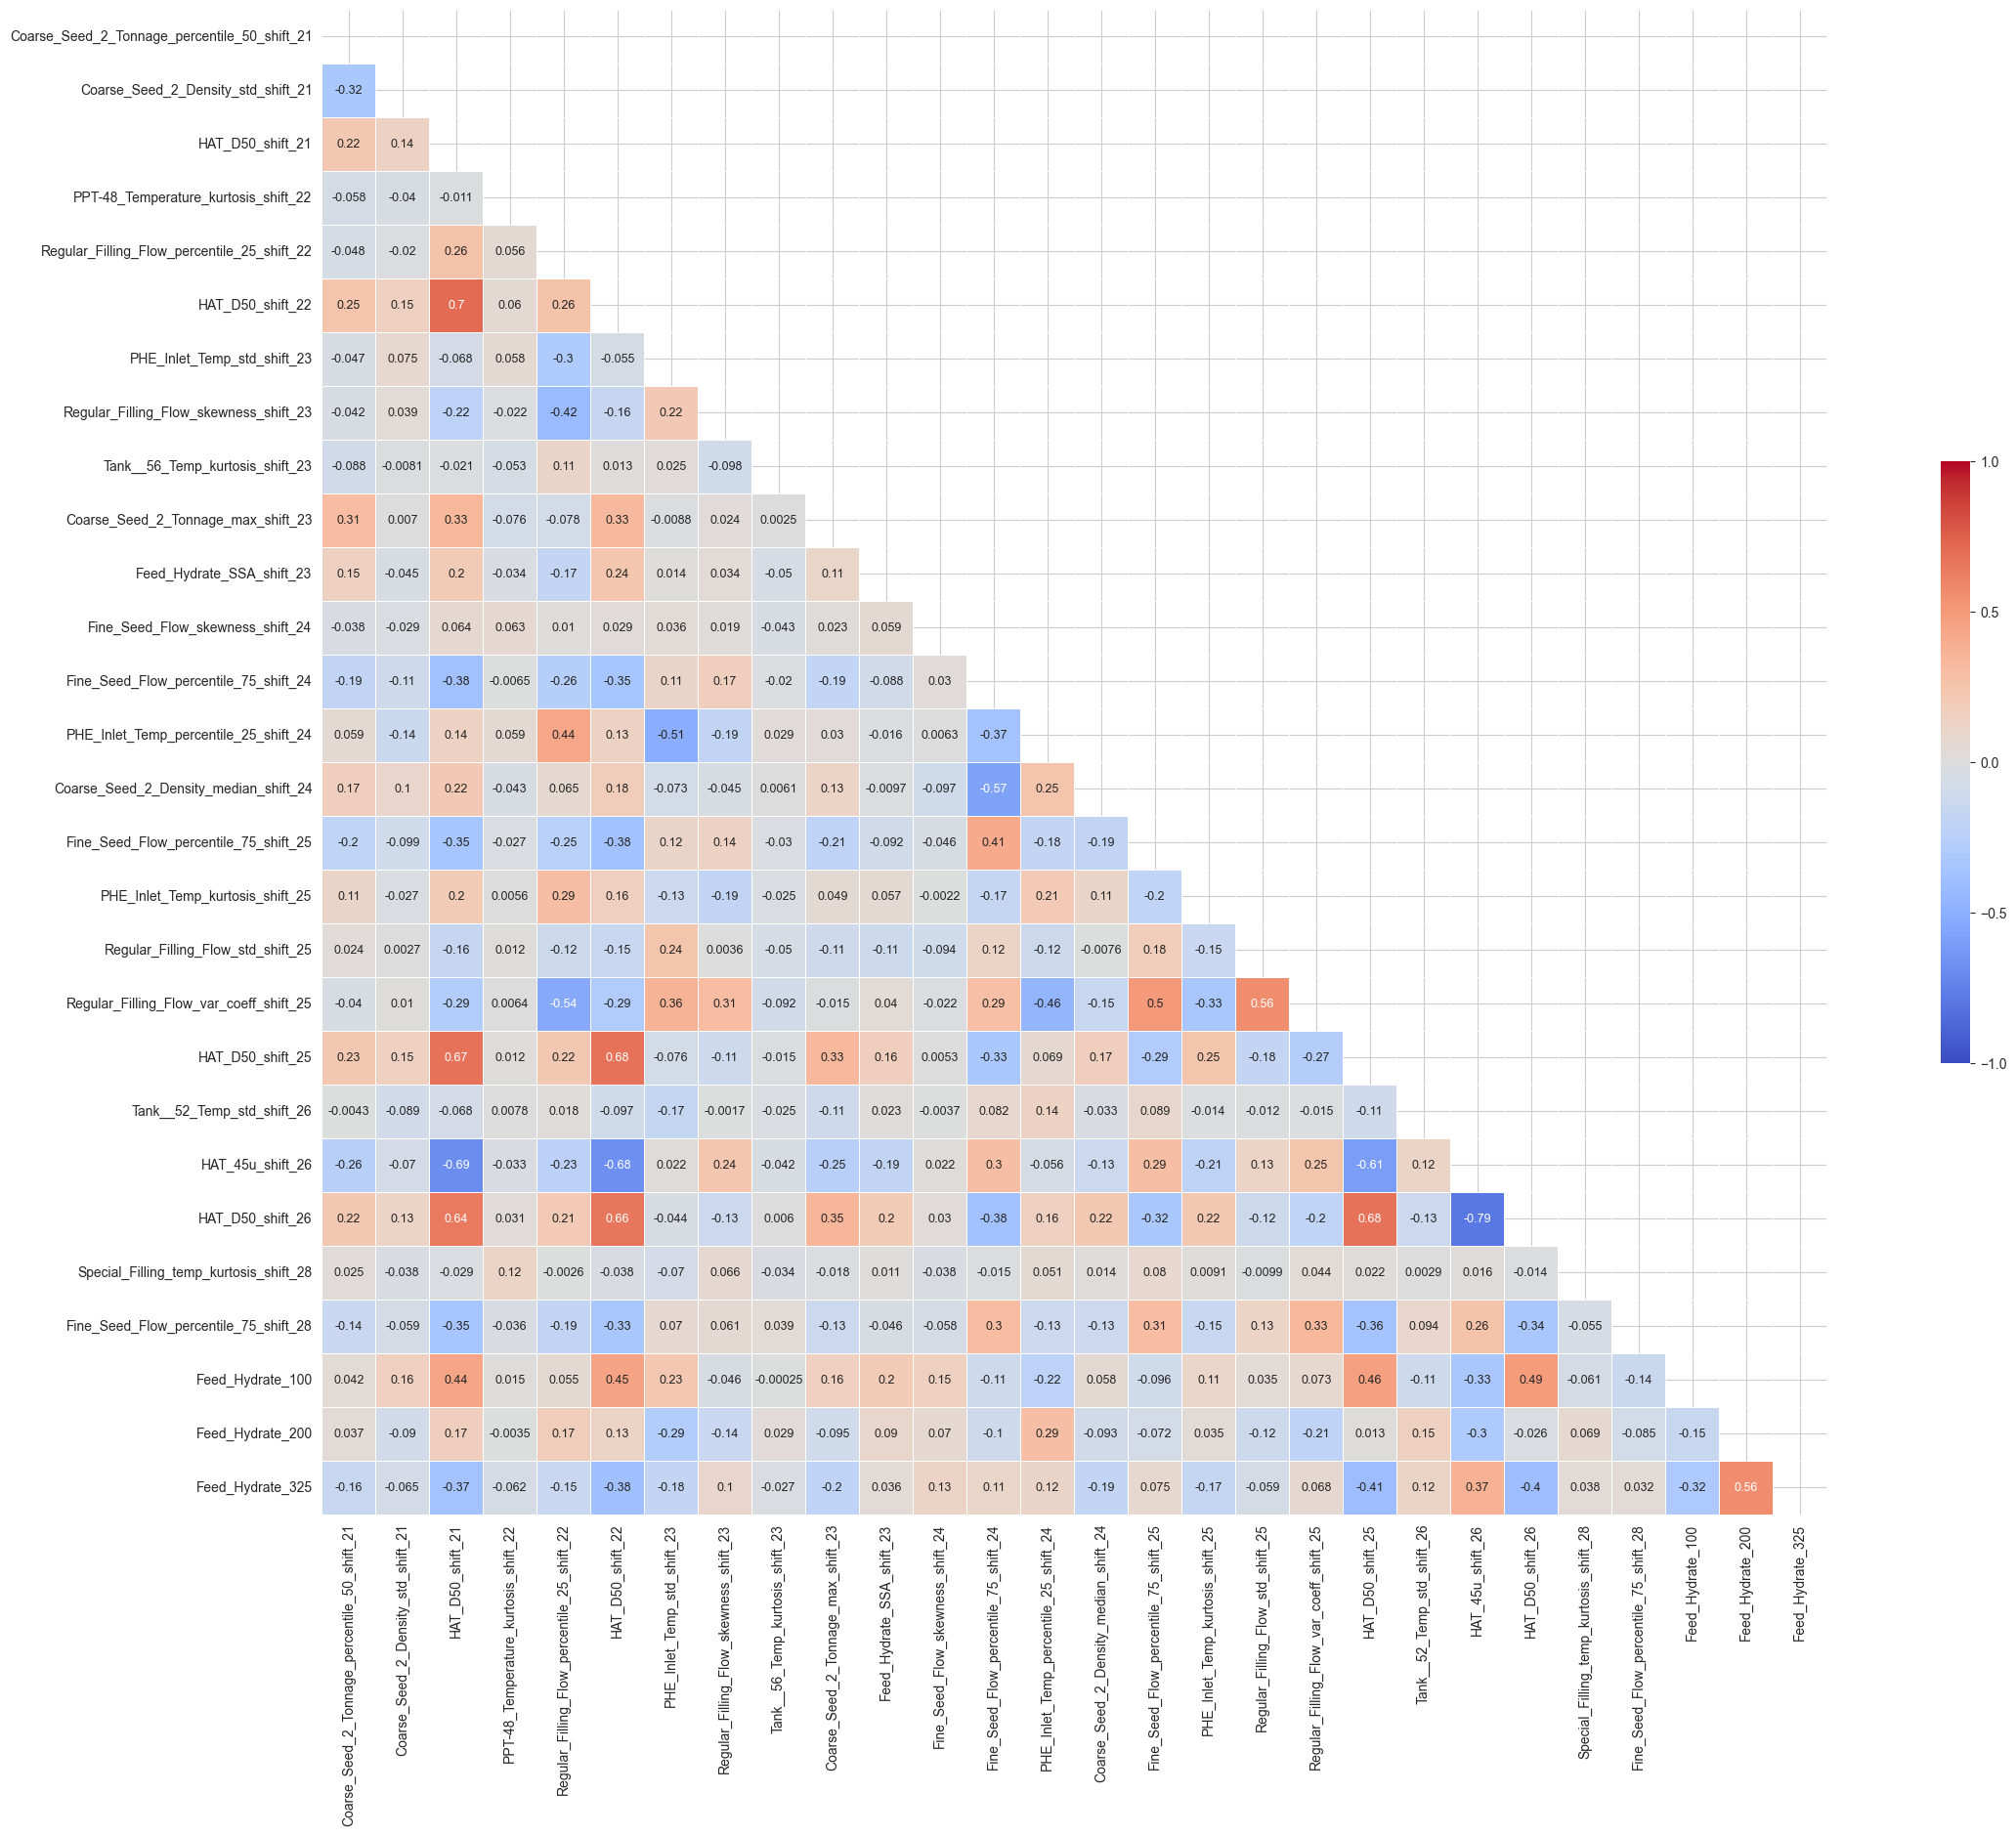

In [62]:
corr_matrix=df1.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

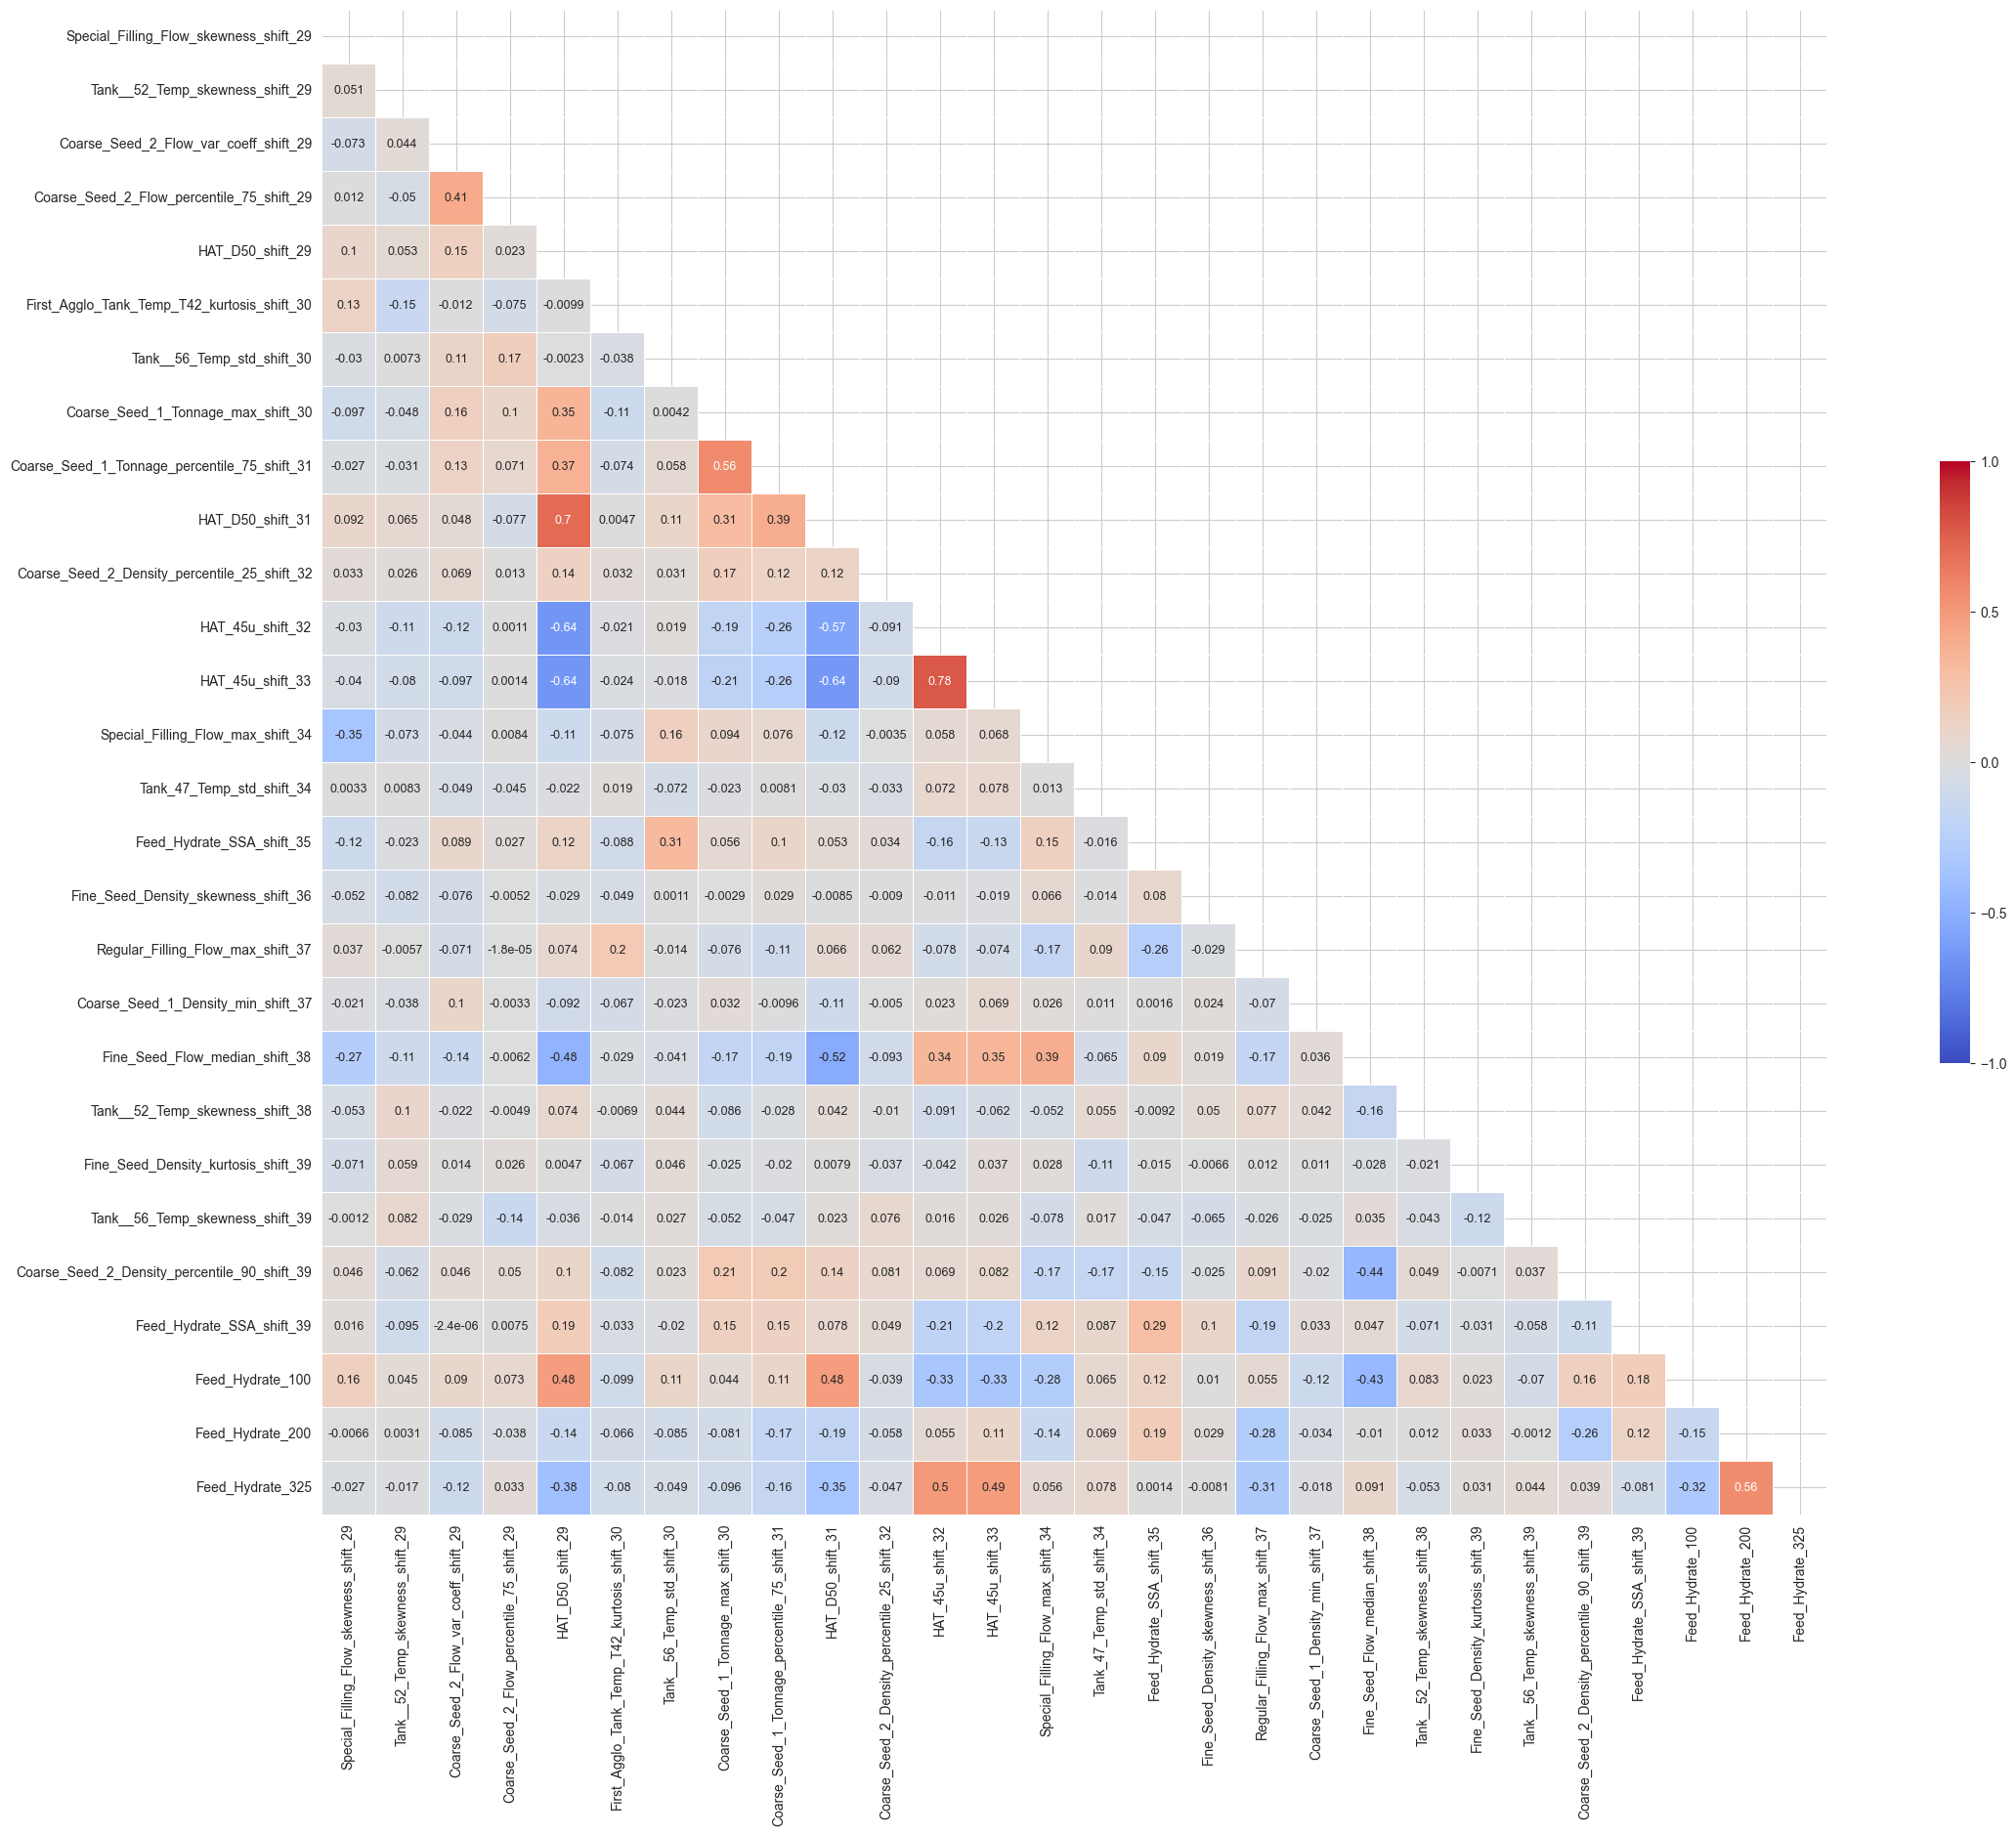

In [63]:
corr_matrix=dfs[1].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

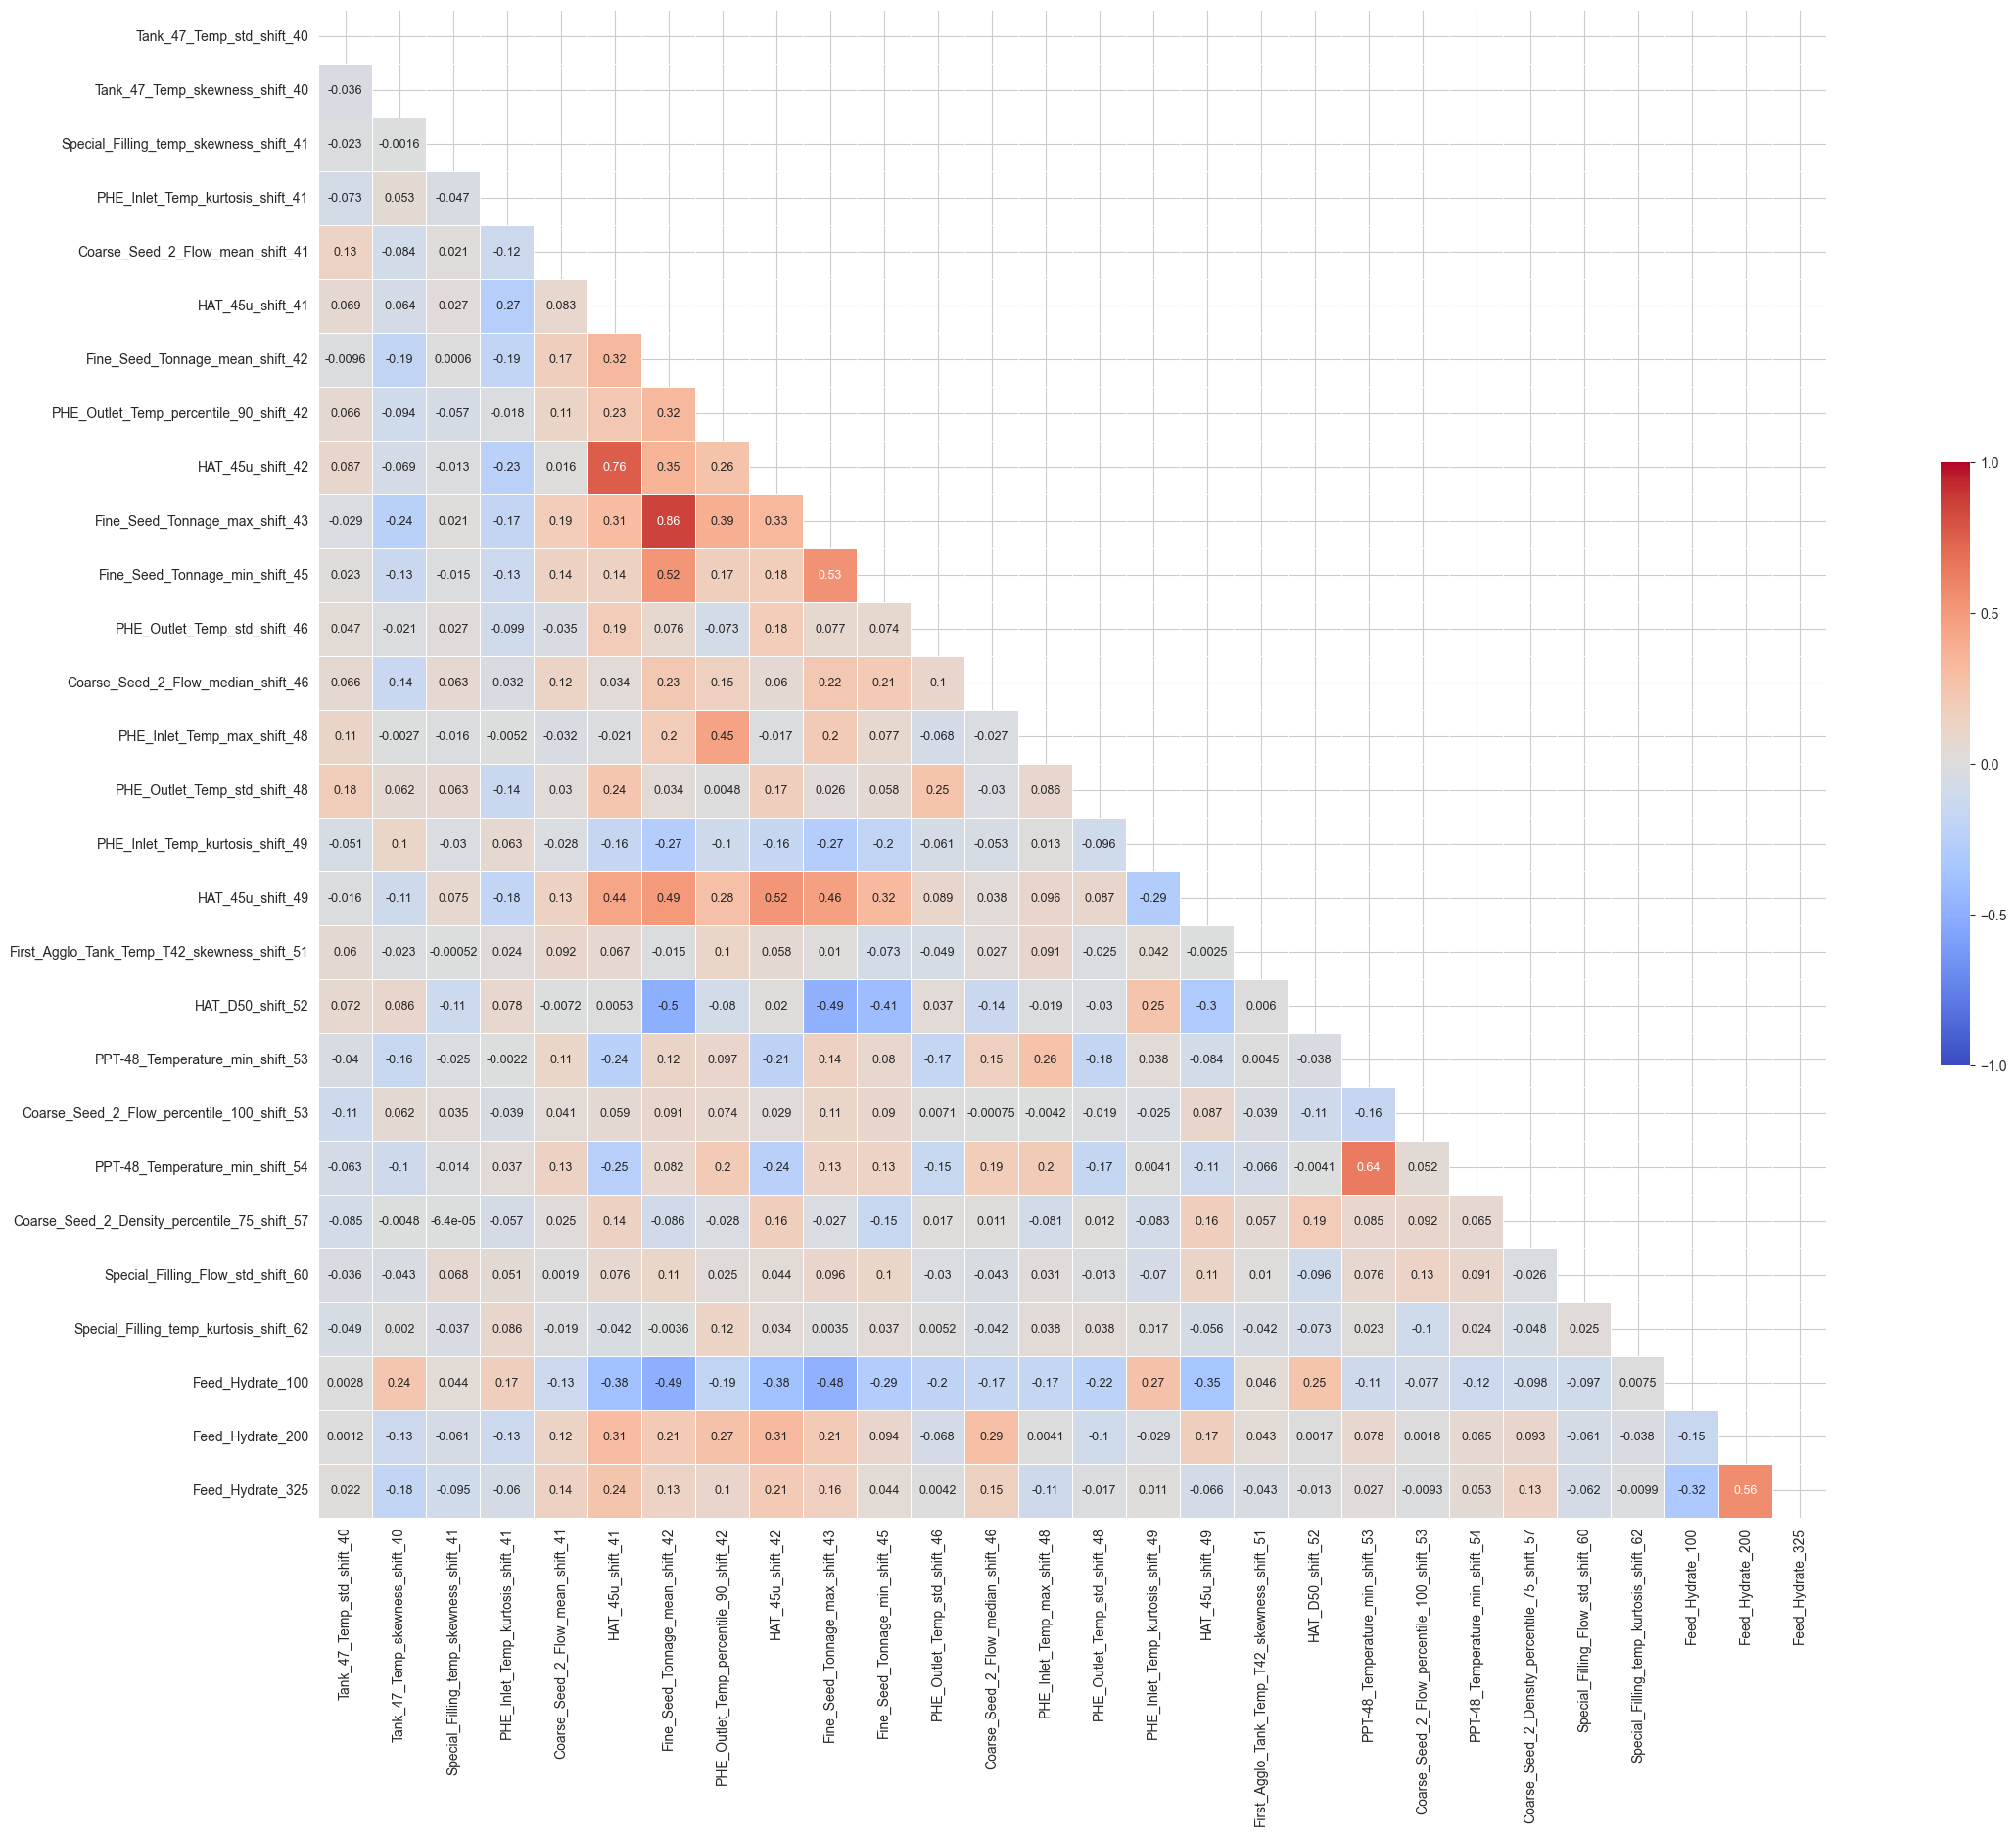

In [64]:
corr_matrix=dfs[2].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

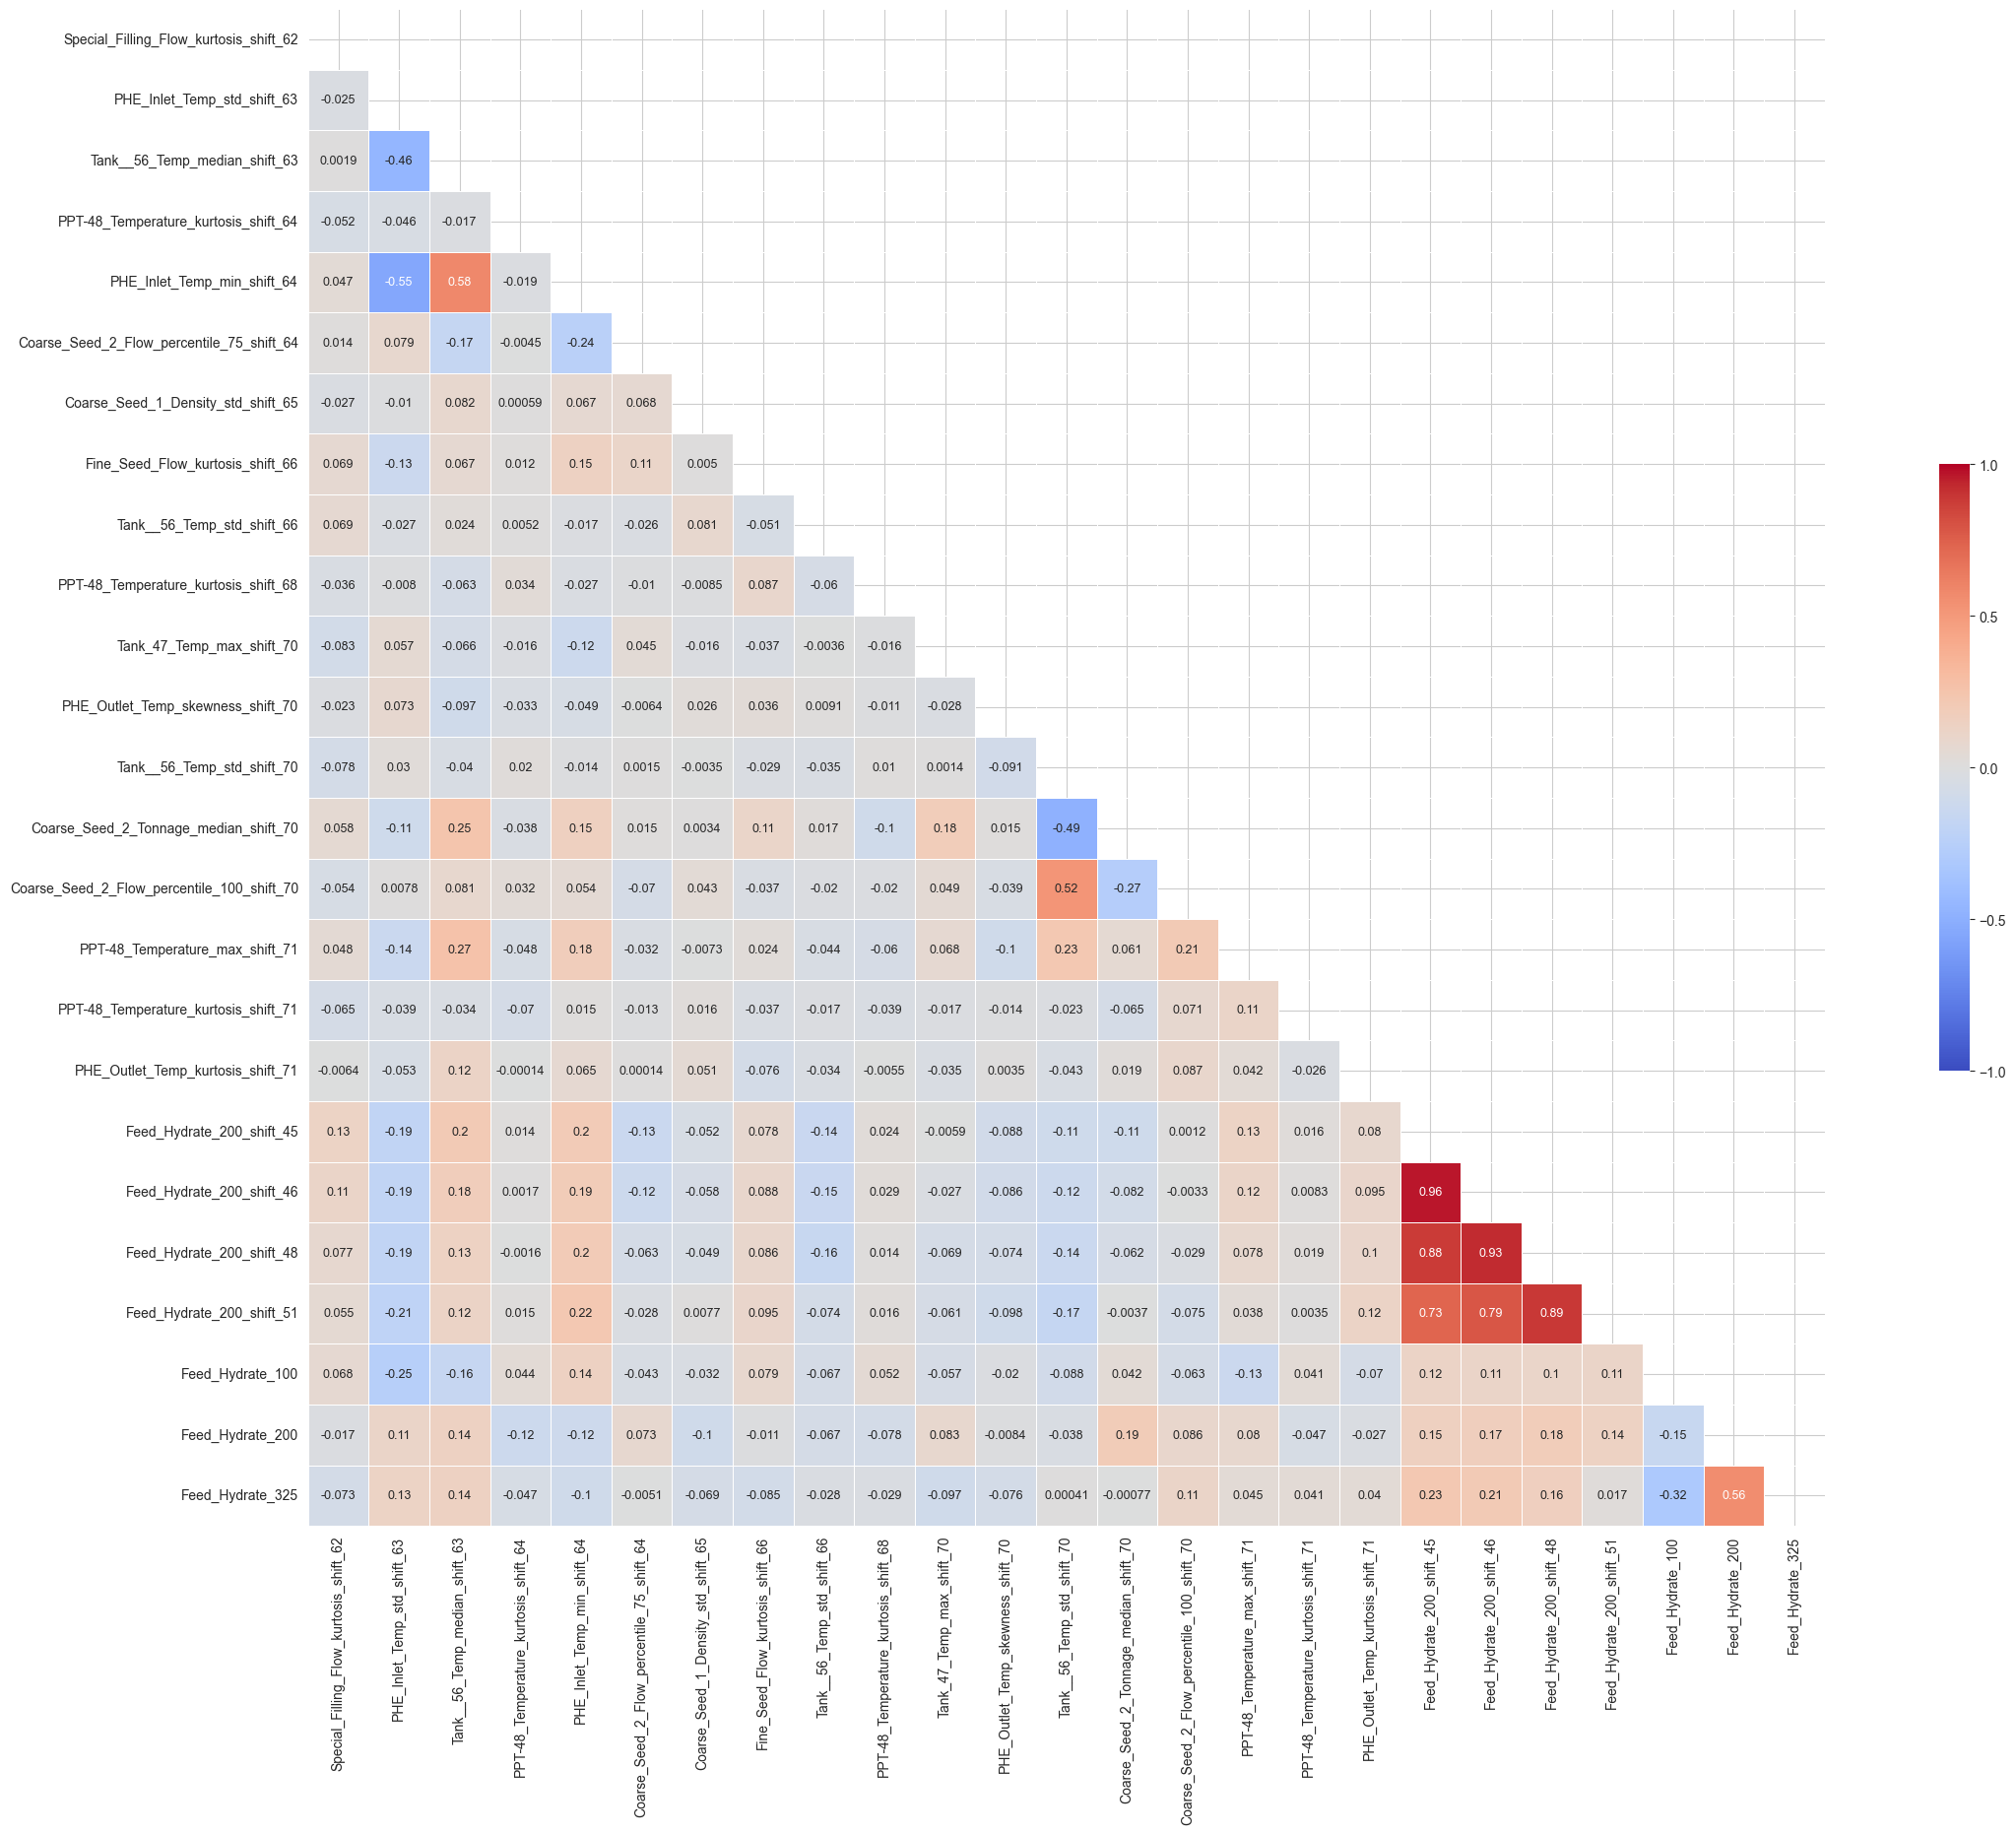

In [65]:
corr_matrix=dfs[3].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

In [66]:
Final_df_lag_sep=Final_df_lag[Final_df_lag.index>"2023-08-31"]

In [67]:
# Define target columns
target_columns = ["Feed_Hydrate_100", "Feed_Hydrate_200", "Feed_Hydrate_325"]

# Exclude target columns from the feature list
columns_without_target = [col for col in Final_df_lag_sep.columns if col not in target_columns]

# Split into chunks of 25 features each
splits = [columns_without_target[i:i+25] for i in range(0, len(columns_without_target), 25)]

# Create DataFrames with each split + all 3 target columns
dfs = [Final_df_lag_sep[split + target_columns] for split in splits]


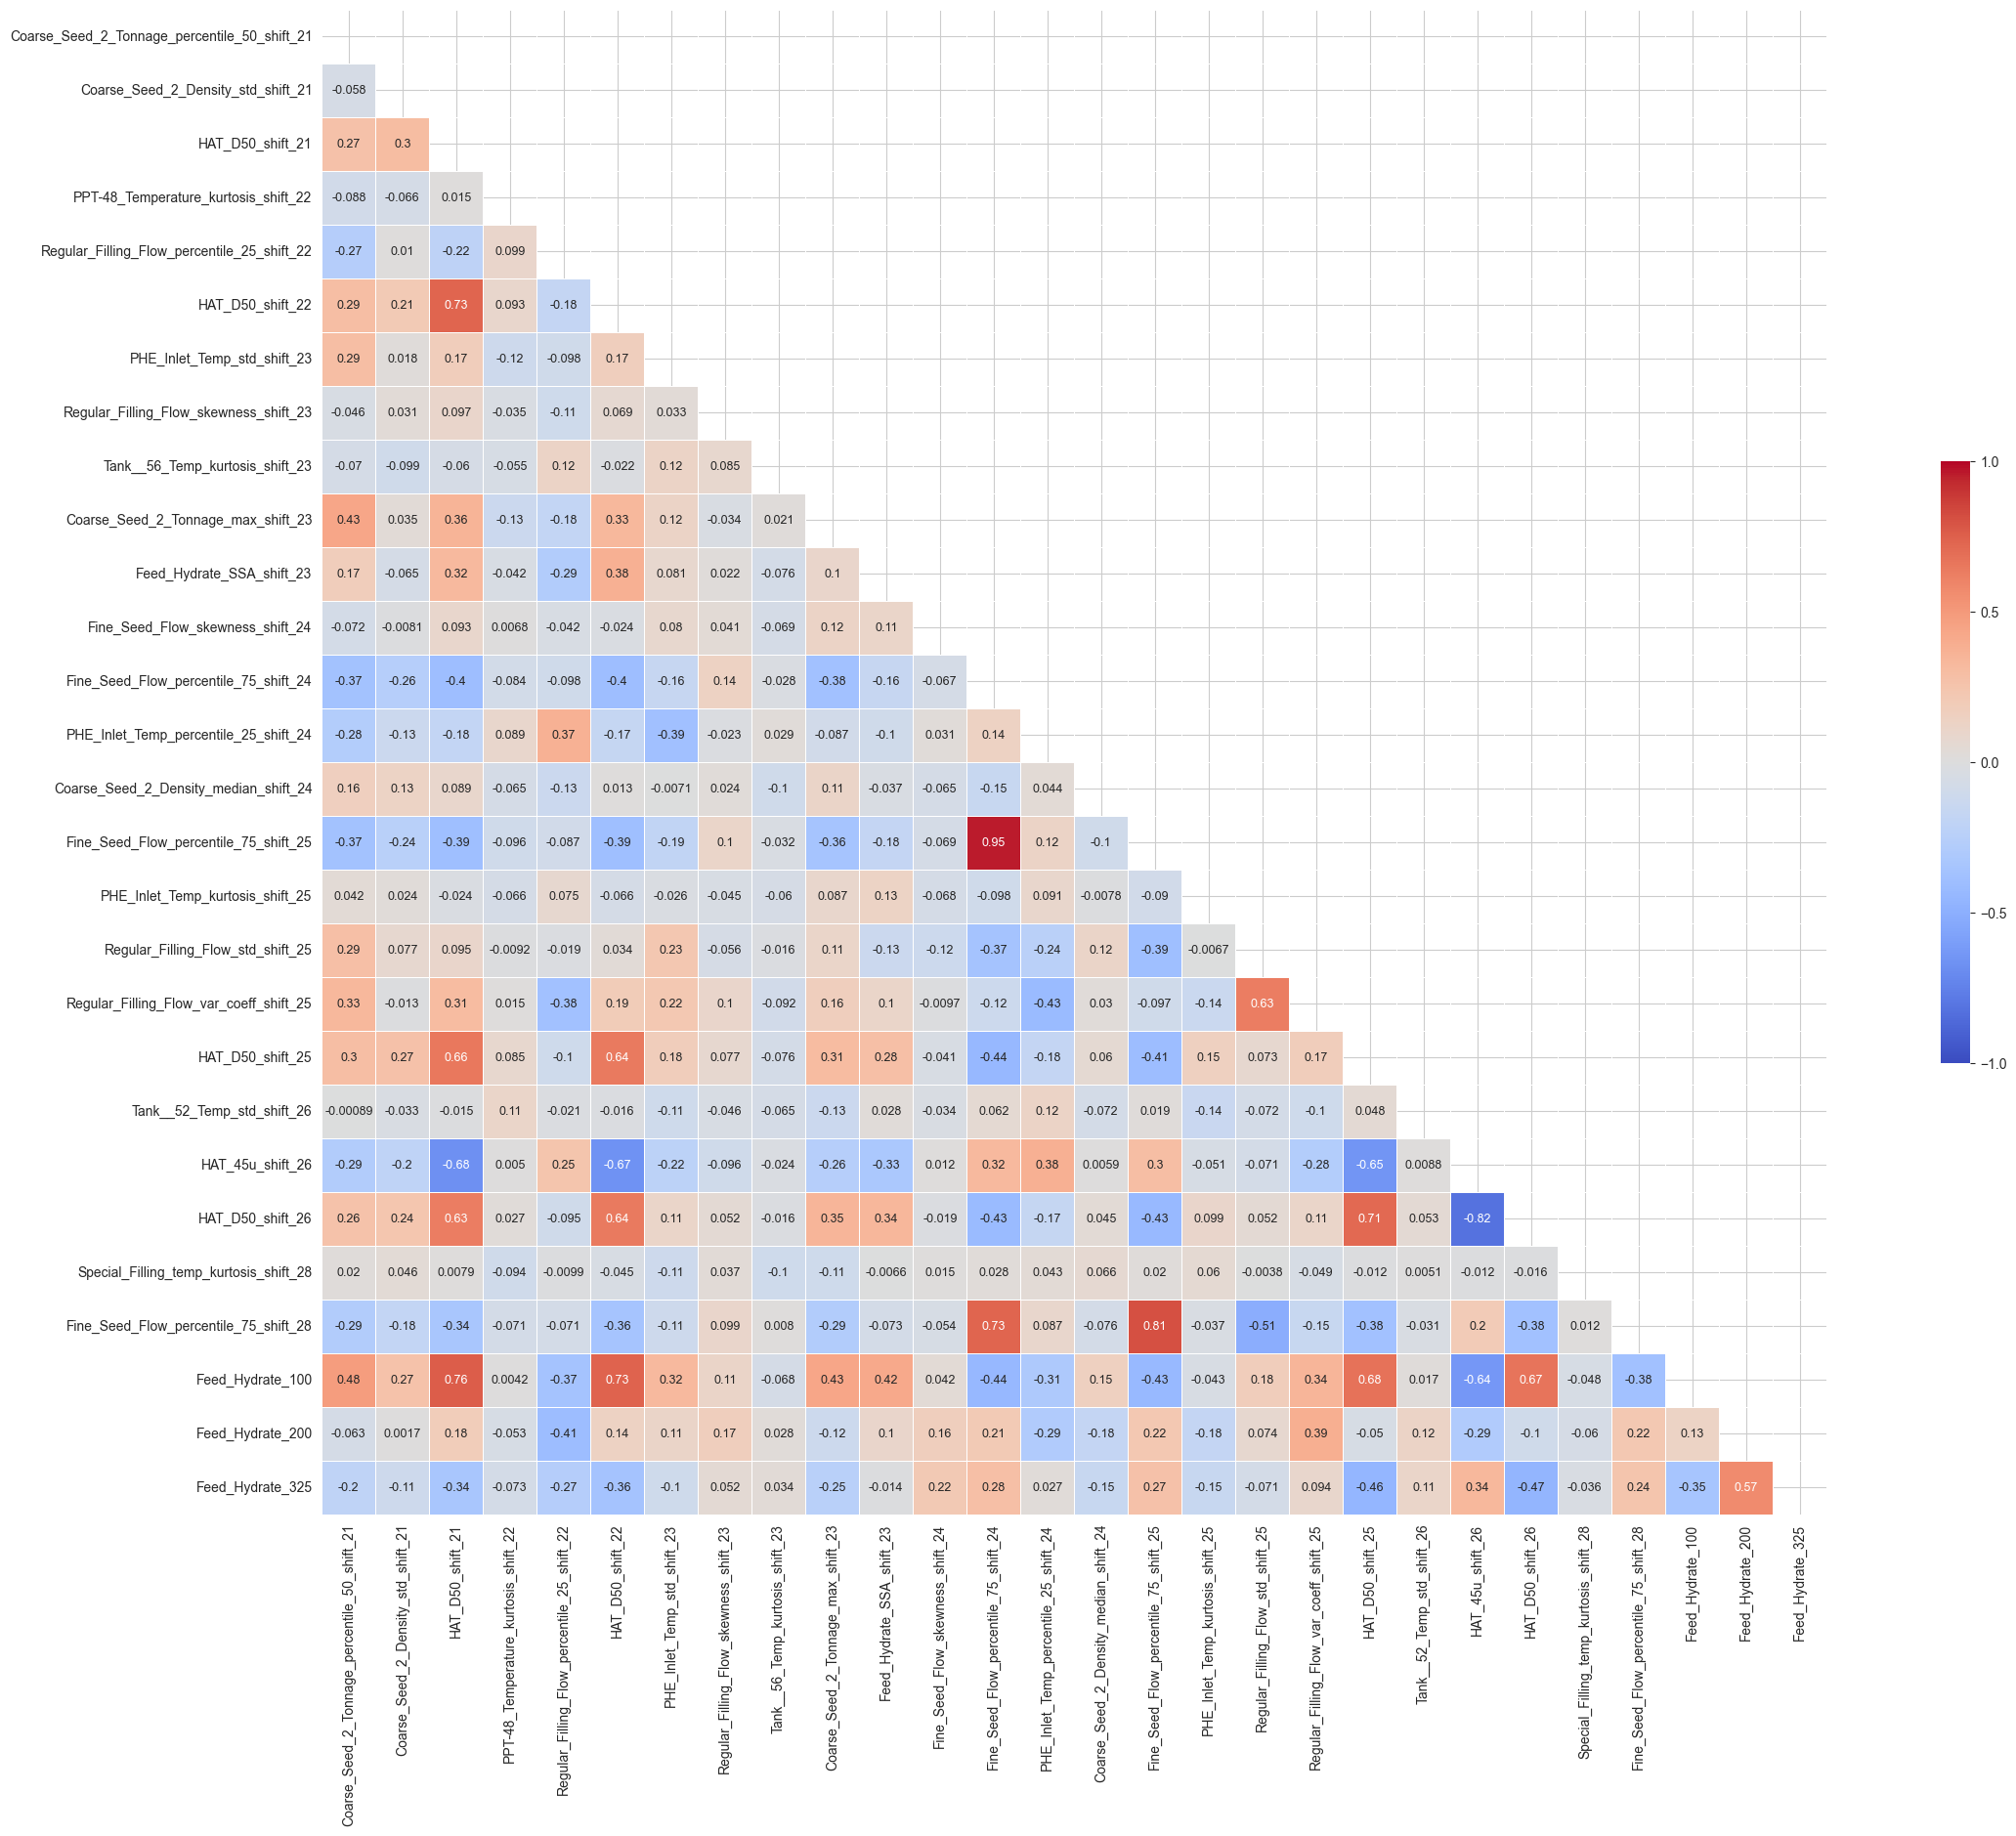

In [68]:
corr_matrix=dfs[0].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
fig, ax = plt.subplots(figsize=(30, 20)) 
heatmap = sns.heatmap(corr_matrix, 
                       mask = mask,
                       square = True,
                       linewidths = .5,
                       cmap = 'coolwarm',
                       cbar_kws = {'shrink': .4, 
                                 'ticks' : [-1, -.5, 0, 0.5, 1]},
                       vmin = -1, 
                       vmax = 1,
                       annot = True,
                       annot_kws = {'size': 9})

In [69]:
# Define your target columns
target_columns = ["Feed_Hydrate_100", "Feed_Hydrate_200", "Feed_Hydrate_325"]

# Compute full correlation matrix
correlation_matrix = Final_df_lag.corr()

# Store all significant columns in a set to avoid duplicates
significant_corr_cols = set()

# Loop through each target and collect significantly correlated features
for target in target_columns:
    corr_with_target = correlation_matrix[target]
    significant = corr_with_target[(corr_with_target > 0.3) | (corr_with_target < -0.3)].index.tolist()
    significant_corr_cols.update(significant)

# Convert to list and optionally sort
significant_corr_cols = sorted(list(significant_corr_cols))

# Display result
print("Significantly correlated columns with any of the targets:")
print(significant_corr_cols)


Significantly correlated columns with any of the targets:
['Feed_Hydrate_100', 'Feed_Hydrate_200', 'Feed_Hydrate_325', 'Fine_Seed_Flow_median_shift_38', 'Fine_Seed_Tonnage_max_shift_43', 'Fine_Seed_Tonnage_mean_shift_42', 'HAT_45u_shift_26', 'HAT_45u_shift_32', 'HAT_45u_shift_33', 'HAT_45u_shift_41', 'HAT_45u_shift_42', 'HAT_45u_shift_49', 'HAT_D50_shift_21', 'HAT_D50_shift_22', 'HAT_D50_shift_25', 'HAT_D50_shift_26', 'HAT_D50_shift_29', 'HAT_D50_shift_31', 'Regular_Filling_Flow_max_shift_37']


In [70]:
significant_corr_cols

['Feed_Hydrate_100',
 'Feed_Hydrate_200',
 'Feed_Hydrate_325',
 'Fine_Seed_Flow_median_shift_38',
 'Fine_Seed_Tonnage_max_shift_43',
 'Fine_Seed_Tonnage_mean_shift_42',
 'HAT_45u_shift_26',
 'HAT_45u_shift_32',
 'HAT_45u_shift_33',
 'HAT_45u_shift_41',
 'HAT_45u_shift_42',
 'HAT_45u_shift_49',
 'HAT_D50_shift_21',
 'HAT_D50_shift_22',
 'HAT_D50_shift_25',
 'HAT_D50_shift_26',
 'HAT_D50_shift_29',
 'HAT_D50_shift_31',
 'Regular_Filling_Flow_max_shift_37']

In [71]:
model_df_selected_features=Final_df_lag[significant_corr_cols]

In [72]:
model_df_selected_features.reset_index(inplace = True)

In [73]:
model_df_selected_features['Timestamp_To'] = pd.to_datetime(model_df_selected_features['Timestamp_To'])
model_df_selected_features['Timestamp_To'] = model_df_selected_features['Timestamp_To'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [74]:
model_df_selected_features.set_index(['Timestamp_To'],inplace=True)

In [75]:
target_columns = ['Feed_Hydrate_100', 'Feed_Hydrate_200', 'Feed_Hydrate_325']


In [76]:
train=model_df_selected_features[model_df_selected_features.index<='2023-08-31']

In [77]:
test=model_df_selected_features[model_df_selected_features.index>'2023-08-31']

In [78]:
print(train.shape)
print(test.shape)

(171, 19)
(158, 19)


In [79]:
target_columns = ['Feed_Hydrate_100', 'Feed_Hydrate_200', 'Feed_Hydrate_325']

X_train = train.drop(columns=target_columns)
y_train = train[target_columns]

X_test = test.drop(columns=target_columns)
y_test = test[target_columns]


In [80]:
params = {
    "objective": "regression",
    "metric": "rmse",  
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

In [81]:
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# Define model
base_model = LGBMRegressor()

# Wrap it for multi-output
model = MultiOutputRegressor(base_model)

# Fit model on multiple targets
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 171, number of used features: 16
[LightGBM] [Info] Start training from score 4.095864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

MultiOutputRegressor(estimator=LGBMRegressor())

In [82]:
preds = model.predict(X_test.values)

In [83]:
Mape_test = mean_absolute_percentage_error(y_test[target_columns],preds)
print(Mape_test)

19.60778601310385


In [84]:
MSE_test = mean_squared_error(y_test[target_columns],preds)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_test)

3.8824968290610755


In [85]:
test1=y_test.copy()

In [86]:
test1[['1_PRED', '200_PRED', '325_PRED']] = preds


In [87]:
test1.head(100)

Feed_Hydrate_100  Feed_Hydrate_200  Feed_Hydrate_325    1_PRED   200_PRED   325_PRED
Timestamp_To                                                                                             
2023-08-31 00:00:00          3.000000         75.000000         95.000000  2.694325  80.027850  95.025790
2023-09-01 00:00:00          2.000000         75.000000         95.000000  2.600527  78.509541  94.396890
2023-09-02 00:00:00          2.000000         75.958333         94.041667  3.102124  78.243504  94.215804
2023-09-03 00:00:00          2.000000         75.041667         94.958333  2.354508  77.132143  94.352061
2023-09-04 00:00:00          2.958333         76.916667         95.000000  2.325900  76.626502  95.411786
2023-09-05 00:00:00          3.000000         75.083333         95.000000  2.837515  77.381530  95.151470
2023-09-06 00:00:00          3.000000         75.000000         95.000000  2.783043  78.503390  96.030342
2023-09-07 00:00:00          3.000000         74.041667         95.958333  2.450448  76.481779  95.822800
2023-09-08 00:00:00          3.000000         72.083333         96.000000  2.821230  74.547823  96.708603
2023-09-09 00:00:00          2.041667         71.041667         96.958333  3.048095  75.830990  96.315042
2023-09-10 00:00:00          2.000000         70.041667         97.000000  2.911593  71.421834  94.907422
2023-09-11 00:00:00          2.958333         70.000000         97.000000  2.305840  75.349192  97.124536
2023-09-12 00:00:00          3.000000         73.833333         97.000000  2.525896  76.810320  97.498955
2023-09-13 00:00:00          3.000000         74.958333         97.000000  2.697589  76.166491  97.308799
2023-09-14 00:00:00          3.000000         75.958333         97.958333  2.684762  76.655496  98.353242
2023-09-15 00:00:00          3.000000         75.041667         98.000000  1.837452  76.961692  98.197546
2023-09-16 00:00:00          3.958333         75.958333         98.000000  2.369996  77.561760  97.898251
2023-09-17 00:00:00          4.000000         78.875000         98.000000  2.510393  81.808486  97.367898
2023-09-18 00:00:00          3.616667         79.000000         98.000000  3.277672  80.779240  96.997603
2023-09-19 00:00:00          3.025000         77.083333         98.000000  2.703929  79.742934  97.055496
2023-09-20 00:00:00          3.000000         79.875000         98.958333  2.525165  82.314023  97.715725
2023-09-21 00:00:00          3.000000         80.000000         98.041667  3.092388  80.507174  97.738487
2023-09-22 00:00:00          3.958333         80.958333         98.000000  4.622873  77.691776  97.501748
2023-09-23 00:00:00          3.041667         81.000000         98.958333  2.722771  82.379256  98.176086
2023-09-24 00:00:00          3.958333         82.916667         99.000000  3.316833  78.007968  96.839598
2023-09-25 00:00:00          4.000000         83.958333         98.041667  3.235150  80.503444  97.394203
2023-09-26 00:00:00          4.000000         84.000000         98.000000  2.862062  79.115885  97.306726
2023-09-27 00:00:00          4.958333         84.958333         98.000000  3.181220  83.697381  97.286087
2023-09-28 00:00:00          5.000000         83.083333         96.083333  2.201788  81.909911  96.159054
2023-09-29 00:00:00          4.041667         82.041667         97.916667  3.124776  83.708444  96.534111
2023-09-30 00:00:00          4.000000         81.040000         95.120000  2.793397  79.835721  96.663990
2023-10-01 00:00:00          4.000000         83.000000         95.000000  3.108961  84.129170  96.265777
2023-10-02 00:00:00          4.000000         83.958333         95.958333  3.450997  78.710645  96.799844
2023-10-03 00:00:00          4.958333         84.958333         96.958333  3.090879  74.386993  95.977680
2023-10-04 00:00:00          4.041667         84.041667         95.083333  3.312627  79.976590  95.602712
2023-10-05 00:00:00          4.000000         84.000000         95.000000  3.064645  80.414643  95.

In [88]:
pwd

'D:\\BGM_Codebase\\+200mesh_test\\200_mesh_final\\Raw_Data'

In [89]:
columns_list = train.columns.tolist()

In [90]:
columns_list

['Feed_Hydrate_100',
 'Feed_Hydrate_200',
 'Feed_Hydrate_325',
 'Fine_Seed_Flow_median_shift_38',
 'Fine_Seed_Tonnage_max_shift_43',
 'Fine_Seed_Tonnage_mean_shift_42',
 'HAT_45u_shift_26',
 'HAT_45u_shift_32',
 'HAT_45u_shift_33',
 'HAT_45u_shift_41',
 'HAT_45u_shift_42',
 'HAT_45u_shift_49',
 'HAT_D50_shift_21',
 'HAT_D50_shift_22',
 'HAT_D50_shift_25',
 'HAT_D50_shift_26',
 'HAT_D50_shift_29',
 'HAT_D50_shift_31',
 'Regular_Filling_Flow_max_shift_37']

In [91]:
model_final_cols=f'precip_final_cols.pkl'
pickle_path = f"D:/BGM_Codebase/+200mesh_test/model_pickles"
pathlib.Path(pickle_path).mkdir(parents=True, exist_ok=True)
with open(os.path.join(pickle_path,model_final_cols), 'wb') as file:
    pickle.dump(columns_list, file)


In [92]:

model_filename = f'precip_Light_gbm_model_day.pkl'


    
params_filename = f'precip_Best_Params.pkl'
    
with open(os.path.join(pickle_path,model_filename), 'wb') as file:
    pickle.dump(model, file)
    
with open(os.path.join( pickle_path,params_filename), 'wb') as file:
    pickle.dump(params, file)